# S(k), n(k) 

analyses and size corrections 

V. Gorelov (2018)

In [5]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [1]:
import numpy
import routines
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit
eV=27.2114

In [554]:
routines.AverageAndVar(numpy.loadtxt(('C2CP250/RMC8/rmc0.dat'),usecols=9, skiprows=100))

array([-5.39205805e-01,  3.82149260e-06])

In [2]:
"load data for C2C"
M=108
nconf=[350,400,300]
nconf_e=[450,500]
dataC2C=[]
VdataC2C=[]
dataC2C.append(numpy.stack((routines.AverageAndVar(numpy.loadtxt(('C2CP250/RMC8/rmc%d.np.1.excite' % k),
                                                               usecols=(range(0,256*2,2)), skiprows=10))[0] 
                              for k in range(-6,7,2))
                            ))
VdataC2C.append(numpy.stack((routines.AverageAndVar(numpy.loadtxt(('C2CP250/RMC8/rmc%d.np.1.excite' % k),
                                                          usecols=(range(0,256*2,2)), skiprows=10))[1] 
                               for k in range(-6,7,2))
                             ))

dataC2C.append(numpy.stack((routines.AverageAndVar(numpy.loadtxt(('C2CP300/RMC_Long/rmc%d.np.1.excite' % k),
                                                               usecols=(range(0,256*2,2)), skiprows=10))[0] 
                              for k in range(-6,7,2))
                            ))
VdataC2C.append(numpy.stack((routines.AverageAndVar(numpy.loadtxt(('C2CP300/RMC_Long/rmc%d.np.1.excite' % k),
                                                          usecols=(range(0,256*2,2)), skiprows=10))[1] 
                               for k in range(-6,7,2))
                             ))


for i in nconf:
    dataC2C.append(numpy.stack((routines.AverageAndVar(numpy.loadtxt(('C2CP%d/RMC/rmc%d.np.1.excite' % (i, k)),
                                                               usecols=(range(0,M*2,2)), skiprows=10))[0] 
                              for k in range(-6,7,2))
                            ))
    VdataC2C.append(numpy.stack((routines.AverageAndVar(numpy.loadtxt(('C2CP%d/RMC/rmc%d.np.1.excite' % (i, k)),
                                                          usecols=(range(0,M*2,2)), skiprows=10))[1] 
                               for k in range(-6,7,2))
                             ))
for i in nconf_e:
    dataC2C.append(numpy.stack((routines.AverageAndVar(numpy.loadtxt(('C2cp%d/C2cp%dt02np32%d.np.1.excite' % (i,i,k)),
                                                               usecols=(range(0,M*2,2)), skiprows=10))[0] 
                              for k in range(-6,7,2))
                            ))
    VdataC2C.append(numpy.stack((routines.AverageAndVar(numpy.loadtxt(('C2cp%d/C2cp%dt02np32%d.np.1.excite' % (i,i,k)),
                                                          usecols=(range(0,M*2,2)), skiprows=10))[1] 
                               for k in range(-6,7,2))
                             ))

In [15]:
"load data C2C P250 more"
M=256
dataC2CP250_8=numpy.stack((routines.AverageAndVar(numpy.loadtxt(('C2CP250/RMC8/rmc%d.np.1.excite' % k),
                                                               usecols=(range(0,M*2,2)), skiprows=10))[0] 
                              for k in range(-8,9,2))
                            )
VdataC2CP250_8=numpy.stack((routines.AverageAndVar(numpy.loadtxt(('C2CP250/RMC8/rmc%d.np.1.excite' % k),
                                                          usecols=(range(0,M*2,2)), skiprows=10))[1] 
                               for k in range(-8,9,2))
                             )

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  """
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if __name__ == '__main__':


In [329]:
"load data C2C P450 Optimized"
M=108
dataC2CP450_OPT=numpy.stack((routines.AverageAndVar(numpy.loadtxt(('C2cp450/C2cp450_OPT/C2cp450/C2cp450t02np32%d.np.1.excite' % k),
                                                               usecols=(range(0,M*2,2)), skiprows=10))[0] 
                              for k in range(-6,7,2))
                            )
VdataC2CP450_OPT=numpy.stack((routines.AverageAndVar(numpy.loadtxt(('C2cp450/C2cp450_OPT/C2cp450/C2cp450t02np32%d.np.1.excite' % k),
                                                          usecols=(range(0,M*2,2)), skiprows=10))[1] 
                               for k in range(-6,7,2))
                             )

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  """
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if __name__ == '__main__':


In [417]:
"load data C2C P300 more"
M=108
dataC2CP300_10=numpy.stack((routines.AverageAndVar(numpy.loadtxt(('C2CP300/RMC/rmc%d.np.1.excite' % k),
                                                               usecols=(range(0,M*2,2)), skiprows=10))[0] 
                              for k in range(-10,11,2))
                            )
VdataC2CP300_10=numpy.stack((routines.AverageAndVar(numpy.loadtxt(('C2CP300/RMC/rmc%d.np.1.excite' % k),
                                                          usecols=(range(0,M*2,2)), skiprows=10))[1] 
                               for k in range(-10,11,2))
                             )

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  """
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if __name__ == '__main__':


In [4]:
"load data C2C P300 more"
M=108
dataC2CP300_8=numpy.stack((routines.AverageAndVar(numpy.loadtxt(('C2CP300/RMC/rmc%d.np.1.excite' % k),
                                                               usecols=(range(0,M*2,2)), skiprows=20))[0] 
                              for k in range(-8,9,2))
                            )
VdataC2CP300_8=numpy.stack((routines.AverageAndVar(numpy.loadtxt(('C2CP300/RMC/rmc%d.np.1.excite' % k),
                                                          usecols=(range(0,M*2,2)), skiprows=20))[1] 
                               for k in range(-8,9,2))
                             )

In [5]:
numpy.save('dataC2CP300_v_noc',numpy.asarray([dataC2CP300_8,VdataC2CP300_8]))

In [9]:
"load data C2C P450 new"
M=108
dataC2CP450 =numpy.stack((routines.AverageAndVar(numpy.loadtxt(('C2cp450/SizeEff_new/C2cp450/C2cp450t02np32%d.np.1.excite' % k),
                                                               usecols=(range(0,M*2,2)), skiprows=10))[0] 
                              for k in range(-6,7,2))
                            )
VdataC2CP450=numpy.stack((routines.AverageAndVar(numpy.loadtxt(('C2cp450/SizeEff_new/C2cp450/C2cp450t02np32%d.np.1.excite' % k),
                                                          usecols=(range(0,M*2,2)), skiprows=10))[1] 
                               for k in range(-6,7,2))
                             )

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  """
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if __name__ == '__main__':


In [362]:
"load data C2C P550 new conf"
M=256
dataC2CP550 =numpy.stack((routines.AverageAndVar(numpy.loadtxt(('C2CP550/C2CP550_optConf/rmc%d.np.1.excite' % k),
                                                               usecols=(range(0,M*2,2)), skiprows=10))[0] 
                              for k in range(-6,7,2))
                            )
VdataC2CP550=numpy.stack((routines.AverageAndVar(numpy.loadtxt(('C2CP550/C2CP550_optConf/rmc%d.np.1.excite' % k),
                                                          usecols=(range(0,M*2,2)), skiprows=10))[1] 
                               for k in range(-6,7,2))
                             )

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  """
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if __name__ == '__main__':


In [85]:
"load data C2C P500 new conf"
M=256
dataC2CP500 =numpy.stack((routines.AverageAndVar(numpy.loadtxt(('C2cp500/RMC_optConf/rmc%d.np.1.excite' % k),
                                                               usecols=(range(0,M*2,2)), skiprows=10))[0] 
                              for k in range(-6,7,2))
                            )
VdataC2CP500=numpy.stack((routines.AverageAndVar(numpy.loadtxt(('C2cp500/RMC_optConf/rmc%d.np.1.excite' % k),
                                                          usecols=(range(0,M*2,2)), skiprows=10))[1] 
                               for k in range(-6,7,2))
                             )

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  """
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if __name__ == '__main__':


In [301]:
"load data for CMCA12 P400"
M=108

dataCMCA12P400=(numpy.stack((routines.AverageAndVar(numpy.loadtxt(('CMCA12P400/SizeEff_new/CMCA12P400/RMC/rmc%d.np.1.excite' % (k)),
                                                               usecols=(range(0,M*2,2)), skiprows=10))[0] 
                              for k in range(-6,7,2))
                            ))
VdataCMCA12P400=(numpy.stack((routines.AverageAndVar(numpy.loadtxt(('CMCA12P400/SizeEff_new/CMCA12P400/RMC/rmc%d.np.1.excite' % (k)),
                                                          usecols=(range(0,M*2,2)), skiprows=10))[1] 
                               for k in range(-6,7,2))
                             ))


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  # Remove the CWD from sys.path while we load stuff.


In [11]:
dataCMCA12P300_new=(numpy.stack((routines.AverageAndVar(numpy.loadtxt(('SofK/CMCA12P300/RMC/rmc%d.np.1.excite' % (k)),
                                                               usecols=(range(0,M*2,2)), skiprows=10))[0] 
                              for k in range(-6,7,2))
                            ))

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
dataC2CP250_new=(numpy.stack((routines.AverageAndVar(numpy.loadtxt(('SofK/C2CP250/RMC/rmc%d.np.1.excite' % (k)),
                                                               usecols=(range(0,M*2,2)), skiprows=10))[0] 
                              for k in range(-6,7,2))
                            ))

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


In [274]:
"load data for CMCA12"
M=108
nconf=[250,300,350]
dataCMCA12=[]
VdataCMCA12=[]
for i in nconf:
    dataCMCA12.append(numpy.stack((routines.AverageAndVar(numpy.loadtxt(('CMCA12P%d/RMC/rmc%d.np.1.excite' % (i, k)),
                                                               usecols=(range(0,M*2,2)), skiprows=130))[0] 
                              for k in range(-6,7,2))
                            ))
    VdataCMCA12.append(numpy.stack((routines.AverageAndVar(numpy.loadtxt(('CMCA12P%d/RMC/rmc%d.np.1.excite' % (i, k)),
                                                          usecols=(range(0,M*2,2)), skiprows=130))[1] 
                               for k in range(-6,7,2))
                             ))


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if __name__ == '__main__':
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  del sys.path[0]


In [401]:
"load data for Pc48"
M=108
nconf=[300,350]
dataPc48=[]
VdataPc48=[]
dataPc48.append(numpy.stack((routines.AverageAndVar(numpy.loadtxt(('SofK/PC48/PC48P250/RMC/rmc%d.np.1.excite' % (k)),
                                                               usecols=(range(0,M*2,2)), skiprows=10))[0] 
                              for k in range(-6,7,2))
                            ))
VdataPc48.append(numpy.stack((routines.AverageAndVar(numpy.loadtxt(('SofK/PC48/PC48P250/RMC/rmc%d.np.1.excite' % (k)),
                                                          usecols=(range(0,M*2,2)), skiprows=10))[1] 
                               for k in range(-6,7,2))
                             ))
for i in nconf:
    dataPc48.append(numpy.stack((routines.AverageAndVar(numpy.loadtxt(('SofK/PC48/Pc48p%d/Pc48p%dt02np32%d.np.1.excite' % (i, i, k)),
                                                               usecols=(range(0,M*2,2)), skiprows=10))[0] 
                              for k in range(-6,7,2))
                            ))
    VdataPc48.append(numpy.stack((routines.AverageAndVar(numpy.loadtxt(('SofK/PC48/Pc48p%d/Pc48p%dt02np32%d.np.1.excite' % (i, i, k)),
                                                          usecols=(range(0,M*2,2)), skiprows=10))[1] 
                               for k in range(-6,7,2))
                             ))


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if sys.path[0] == '':
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:21: FutureWarning: arrays to stack must be passed as a "sequence" type such 

In [303]:
numpy.argmax(dataCMCA12P400[4])

64

In [305]:
dataCMCA12P400[4][64]=(dataCMCA12P400[4][65]+dataCMCA12P400[4][63])/2.

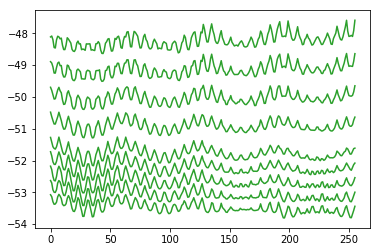

In [494]:
for i in range(9):
#    plt.plot(dataCMCA12[0][i],color='#1f77b4')
#    plt.plot(dataCMCA12[1][i],color='#ff7f0e')
#    plt.plot(dataCMCA12[2][i],color='#2ca02c')
#    plt.plot(dataCMCA12P400[i],color='#2ca02c')


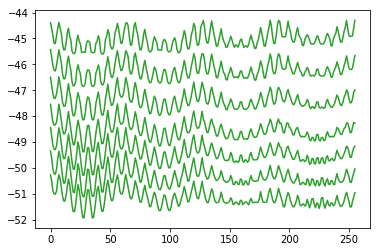

In [86]:
for i in range(7):
#    plt.plot(dataC2C[0][i],color='#1f77b4')
#    plt.plot(dataC2C[1][i],color='#ff7f0e')
#    plt.plot(dataC2C[2][i],color='#2ca02c')
#    plt.plot(dataC2C[4][i],color='#2ca02c')
#    plt.plot(dataC2CP550[i],color='#2ca02c')
    plt.plot(dataC2CP500[i],color='#2ca02c')
#    plt.plot(dataC2CP300_8[i],color='#2ca02c')

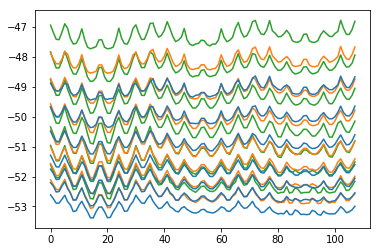

In [402]:
for i in range(7):
    plt.plot(dataPc48[0][i],color='#1f77b4')
    plt.plot(dataPc48[1][i],color='#ff7f0e')
    plt.plot(dataPc48[2][i],color='#2ca02c')

In [3]:
"function that does GC analyses"
def GC_QMC(data,Vdata,mbeg,mend,mstep,Theta,np=6):
    mu = numpy.arange(mbeg,mend,mstep)
#    nn = numpy.arange(-8,9,2)
    nn = numpy.arange(-(np-2),(np-1),2)
#    nn = numpy.arange(-6,7,2)
    N = numpy.zeros((mu.shape[0],Theta))
    E = numpy.zeros((mu.shape[0],Theta))
    VE = numpy.zeros((mu.shape[0],Theta))
#    delta_test=numpy.zeros((nn.shape[0],Theta))

    for i,m in enumerate(mu):
        for theta in range(Theta):
            a=True
            for n,ni in enumerate(nn):
#                delta_test[n,theta]=(data[n+1,theta]-data[n+1-1,theta])/2.
                if (data[n+1,theta]-data[n+1-1,theta])/2.<=m and (data[n+1+1,theta]-data[n+1,theta])/2.>m and a:
#                    a = False
                    N[i,theta]=96+ni
                    E[i,theta]=data[n+1,theta]
                    VE[i,theta]=Vdata[n+1,theta]
    N[N == 0.] = numpy.nan
    E[E == 0.] = numpy.nan
    VN = numpy.nanmean(N**2, axis=1)
    N = numpy.nanmean(N, axis=1)
    E = numpy.nanmean(E, axis=1)
    VE = numpy.sqrt(numpy.sum(VE**2, axis=1))/Theta
    VN = numpy.sqrt((VN-N*N)/Theta)
    a=0.
    for i,m in enumerate(mu):
        if i<mu.shape[0]-2:
            if N[i]==96.: 
                a+=mstep
    return N,E,VE,VN, mu,#(a)*27.2114 #delta_test

In [4]:
"function for S(k,mu) and n(k,mu) that does GC analyses"
def GC_QMC_S(data,Sdata,nkdata,Vdata,mbeg,mend,mstep,Theta):
    mu = numpy.arange(mbeg,mend,mstep)
    nn = numpy.arange(-4,5,2)
#    nn = numpy.arange(-5,6)
    N = numpy.zeros((mu.shape[0],Theta))
    E = numpy.zeros((mu.shape[0],Theta))
    VE = numpy.zeros((mu.shape[0],Theta))
    S = numpy.zeros((Sdata.shape[1],mu.shape[0],Theta))
    nk = numpy.zeros((nkdata.shape[1],mu.shape[0],Theta))
    print S.shape
#    delta_test=numpy.zeros((nn.shape[0],Theta))

    for i,m in enumerate(mu):
        for theta in range(Theta):
            a=True
            for n,ni in enumerate(nn):
#                delta_test[n,theta]=(data[n+1,theta]-data[n+1-1,theta])/2.
                if (data[n+1,theta]-data[n+1-1,theta])/2.<=m and (data[n+1+1,theta]-data[n+1,theta])/2.>m and a:
                    #a = False
                    N[i,theta]=96+ni
                    E[i,theta]=data[n+1,theta]
                    S[:,i,theta]=Sdata[n+1,:,theta]
                    nk[:,i,theta]=nkdata[n+1,:,theta]
                    VE[i,theta]=Vdata[n+1,theta]
    N[N == 0.] = numpy.nan
    E[E == 0.] = numpy.nan
    S[S == 0.] = numpy.nan
    nk[nk == 0.]=numpy.nan
    VN = numpy.nanmean(N**2, axis=1)
    N = numpy.nanmean(N, axis=1)
    E = numpy.nanmean(E, axis=1)
    S = numpy.nanmean(S, axis=2)
    nk= numpy.nanmean(nk,axis=2)
    for i in range(S.shape[0]):
        S[i,:] = S[i,:]/N[:]
    for i in range(nk.shape[0]):
        nk[i,:]= nk[i,:]/N[:]
    VE = numpy.sqrt(numpy.sum(VE**2, axis=1))/Theta
    VN = numpy.sqrt((VN-N*N)/Theta)
    a=0.
    for i,m in enumerate(mu):
        if i<mu.shape[0]-2:
            if N[i]==96.: 
                a+=mstep
    return N,E,VE,VN,S,nk, mu,(a)*27.2114 #delta_test

In [2]:
"load data for optical gap"
TH=numpy.array((1,4,12,17,18,23,31,34,37,40,67,70,79,82,96,98,99,101,103,104,105,106))
Optic_data=routines.AverageAndVar(numpy.loadtxt('C2CP300/OPTIC/rmc0.np.1.excite',
                                                               usecols=(range(0,22*2,2)), skiprows=20))
Optic_data0=routines.AverageAndVar(numpy.loadtxt('C2CP300/RMC/rmc0.np.1.excite',
                                                               usecols=TH*2, skiprows=10))

print(numpy.asarray([Optic_data[0]-Optic_data0[0]])*27.2114)
print(numpy.sqrt(Optic_data[1]**2+Optic_data0[1]**2)*27.2114)

[[4.62292072 4.95209963 5.32170678 5.5032348  5.26177188 4.98119447
  4.25395083 4.26337717 4.53114778 4.70484635 4.67557153 4.34380109
  4.68094018 4.57401481 6.10482686 4.61511724 4.91641316 6.06545259
  4.10876817 4.30447163 4.72358785 3.97632274]]
[0.27681022 0.27335573 0.27446538 0.27885188 0.26730804 0.26735461
 0.27521375 0.26578977 0.27738726 0.26723265 0.26798521 0.26903136
 0.2704244  0.26974084 0.27728434 0.27134464 0.26794125 0.26705241
 0.2732366  0.26743687 0.27498091 0.26501952]


In [6]:
print Optic_data[0]
print Optic_data0[0]

[-50.61438326 -50.61067935 -50.79608543 -50.78965089 -50.79468441
 -50.79845057 -50.61984986 -50.62881949 -50.74324612 -50.73669078
 -50.72094559 -50.72699871 -50.97089209 -50.97809026 -50.82472105
 -51.02460138 -51.02338752 -50.83060528 -50.80210277 -50.94713631
 -50.92478651 -50.80076714]
[-50.78427238 -50.79266556 -50.99165445 -50.99189094 -50.98805086
 -50.981506   -50.77617959 -50.78549563 -50.90976265 -50.90959061
 -50.89276959 -50.88663038 -51.14291338 -51.14618212 -51.04906919
 -51.19420372 -51.20406228 -51.05350644 -50.95309714 -51.10532264
 -51.09837507 -50.94689423]


In [ ]:
numpy.savetxt("Optical.out",numpy.concatenate((vec_theta[[1,4,12,17,18,23,31,34,37,40,67,70,79,82,96,98,99,101,103,104,105,106]]/2/numpy.pi, 
               (numpy.asarray([Optic_data[0]-Optic_data0[0]])*27.2114).T,
                                               (numpy.asarray([Optic_data[1]+Optic_data0[1]])*27.2114).T), axis=1))

# S(k)

In [49]:
"vmad"
vmadC2CP250=3.0787488096677436/11.120467409715490
vmadC2CP300=3.0809018758863416/10.8377774848415
vmadC2CP350=3.0822416646146040/10.601765658514234
vmadC2CP400=3.0831275609558957/10.399592269 
vmadC2CP450=3.0838004300370137/10.223885485533334
vmadC2CP500=3.0859370049086055/10.056250892
vmadC2CP550=3.0876193527797016/9.922482823

vmadC2C=[vmadC2CP250,vmadC2CP300,vmadC2CP350,vmadC2CP400,vmadC2CP450]

In [10]:
(0.4/(vmadC2CP250*eV))**(-1)

18.833980234994506

In [6]:
"vmad CMCA12"
vmadCMCA12P250=2.7827285061796294/10.061367035711047
vmadCMCA12P300=2.7807896511540049/9.79476548695061
vmadCMCA12P350=2.7789547176663314/9.573468549774487
vmadCMCA12P400=2.6820154775088572/9.3835726587

vmadCMCA12=[vmadCMCA12P250,vmadCMCA12P300,vmadCMCA12P350,vmadCMCA12P400]

In [7]:
"vmad Pc48"
vmadPc48P250=3.0687800579611144/11.0761184040
vmadPc48P300=3.0702100769414487/10.7895666420
vmadPc48P350=3.0680973150091670/10.5392794240

vmadPc48=[vmadPc48P250,vmadPc48P300,vmadPc48P350]

In [51]:
"function that fits S(k) and calculates size corrections using v_mad"

def Quad(x,a,b):
    return a+b*x**2

def line(x,a,b):
    return a+x*b

"this is how the size corrections are done"
#I compute corrections with sigma and without and output the ratio to check the 
#accuracy

def getSizeCorr(SofK,Kgrid,cutoff,vmad,Sigma=[None]):    
    ind=numpy.where(Kgrid**2<cutoff)[0]
    sind=0
    if(Sigma[0]!=None): #Sigma is optional
        sind=ind
    sigmafit=curve_fit(line,Kgrid[ind]**2,SofK[ind],sigma=Sigma[sind])[0][0]*vmad/2.
    nosigmafit=curve_fit(line,Kgrid[ind]**2,SofK[ind])[0][0]*vmad/2.
    return numpy.asarray((sigmafit, abs(1-nosigmafit/sigmafit)))
#    return sigmafit

def getSizeCorrPlot(SofK,Kgrid,cutoff,vmad,Sigma=[None]):    
    ind=numpy.where(Kgrid**2<cutoff)[0]
    sind=0
    if(Sigma[0]!=None): #Sigma is optional
        sind=ind
    sigmafit=curve_fit(line,Kgrid[ind]**2,SofK[ind],sigma=Sigma[sind])#[0][0]*vmad/2.
    nosigmafit=curve_fit(line,Kgrid[ind]**2,SofK[ind])[0][0]*vmad/2.
#    return numpy.asarray((sigmafit, abs(1-nosigmafit/sigmafit)))
    return sigmafit

In [22]:
"BragPicks corrected S(K) for C2C P300"
M=108
ScordataC2CP300 = numpy.stack(((numpy.loadtxt(('C2CP300/RMC/rmc%d.rhok2twist' % k),skiprows=2,
                                                               usecols=(range(10,M*4+8,4))) - 
                           numpy.loadtxt(('C2CP300/RMC/rmc%d.rhok2twist' % k),skiprows=2,
                                                               usecols=(range(11,M*4+8,4))))[:477]
                              for k in range(-6,7,2))
                         )
KgridP300 = numpy.loadtxt('C2CP300/RMC/rmc0.rhok2twist',skiprows=2,usecols=(0))

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  import sys


In [48]:
## "BragPicks corrected S(K) for C2C P250 8"
M=256
ScordataC2CP250_8tmp = numpy.stack((numpy.concatenate((numpy.loadtxt(('C2CP250/RMC8/rmc%d.rhok2twist2' % k),skiprows=1),
                                                    numpy.loadtxt(('C2CP250/RMC8/rmc%d.rhok2twist1' % k),skiprows=1)),axis=1))                              
                                  for k in range(-8,9,2))
ScordataC2CP250_8 = ScordataC2CP250_8tmp[:,:,10:M*4+8:4]-ScordataC2CP250_8tmp[:,:,11:M*4+8:4]

KgridP250_8 = numpy.loadtxt('C2CP250/RMC8/rmc0.rhok2twist2',skiprows=1,usecols=(0))

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  """


In [109]:
#numpy.savetxt('C2CP250/RMC8/rmc0.skee',numpy.transpose(numpy.stack((KgridP250_8,numpy.average(ScordataC2CP250_8tmp[3,:,10:M*4+8:4],axis=1)/96.))))

In [67]:
## "BragPicks corrected S(K) for C2C P250 8 new"
M=256
ScordataC2CP250_8L_tmp = numpy.stack((numpy.concatenate((numpy.loadtxt(('C2CP250/RMC_Long/rmc%d.rhok2twist2' % k),skiprows=1),
                                                    numpy.loadtxt(('C2CP250/RMC_Long/rmc%d.rhok2twist1' % k),skiprows=1)),axis=1))                              
                                  for k in range(-8,9,2))
ScordataC2CP250_8L = ScordataC2CP250_8L_tmp[:,:,10:M*4+8:4]-ScordataC2CP250_8L_tmp[:,:,11:M*4+8:4]

KgridP250_8L = numpy.loadtxt('C2CP250/RMC_Long/rmc0.rhok2twist2',skiprows=1,usecols=(0))

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  """


In [106]:
#numpy.savetxt('C2CP300/RMC_Long/rmc0.skee',numpy.transpose(numpy.stack((KgridP300_L,numpy.average(ScordataC2CP300_L_tmp[3,:,10:M*4+8:4],axis=1)/96.))))

In [47]:
## "BragPicks corrected S(K) for C2C P300 6 new"
M=256
ScordataC2CP300_L_tmp = numpy.stack((numpy.concatenate((numpy.loadtxt(('C2CP300/RMC_Long/rmc%d.rhok2twist2' % k),skiprows=1),
                                                    numpy.loadtxt(('C2CP300/RMC_Long/rmc%d.rhok2twist1' % k),skiprows=1)),axis=1))                              
                                  for k in range(-6,7,2))
ScordataC2CP300_L = ScordataC2CP300_L_tmp[:,:,10:M*4+8:4]-ScordataC2CP300_L_tmp[:,:,11:M*4+8:4]

KgridP300_L = numpy.loadtxt('C2CP300/RMC_Long/rmc0.rhok2twist2',skiprows=1,usecols=(0))

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  """


In [11]:
"BragPicks corrected S(K) for C2C P=250, 350, 400"
M=108
ScordataC2CP250 = numpy.stack(((numpy.loadtxt(('SofK/C2CP250/RMC/rmc%d.rhok2twist' % k),skiprows=2,
                                                               usecols=(range(10,M*4+8,4))) - 
                           numpy.loadtxt(('SofK/C2CP250/RMC/rmc%d.rhok2twist' % k),skiprows=2,
                                                               usecols=(range(11,M*4+8,4))))[:477]
                              for k in range(-6,7,2))
                         )
KgridP250 = numpy.loadtxt('SofK/C2CP250/RMC/rmc0.rhok2twist',skiprows=2,usecols=(0))
ScordataC2CP350 = numpy.stack(((numpy.loadtxt(('SofK/C2CP350/RMC/rmc%d.rhok2twist' % k),skiprows=2,
                                                               usecols=(range(10,M*4+8,4))) - 
                           numpy.loadtxt(('SofK/C2CP350/RMC/rmc%d.rhok2twist' % k),skiprows=2,
                                                               usecols=(range(11,M*4+8,4))))[:477]
                              for k in range(-6,7,2))
                         )
KgridP350 = numpy.loadtxt('SofK/C2CP350/RMC/rmc0.rhok2twist',skiprows=2,usecols=(0))
ScordataC2CP400 = numpy.stack(((numpy.loadtxt(('SofK/C2CP400/RMC/rmc%d.rhok2twist' % k),skiprows=2,
                                                               usecols=(range(10,M*4+8,4))) - 
                           numpy.loadtxt(('SofK/C2CP400/RMC/rmc%d.rhok2twist' % k),skiprows=2,
                                                               usecols=(range(11,M*4+8,4))))[:477]
                              for k in range(-6,7,2))
                         )
KgridP400 = numpy.loadtxt('SofK/C2CP400/RMC/rmc0.rhok2twist',skiprows=2,usecols=(0))


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  import sys
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:21: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


In [332]:
"BragPicks corrected S(K) for C2C P=450"
ScordataC2CP450 = numpy.stack(((numpy.loadtxt(('C2cp450/SizeEff_new/C2cp450/C2cp450t02np32%d.rhok2twist' % k),skiprows=2,
                                                               usecols=(range(10,M*4+8,4))) - 
                           numpy.loadtxt(('C2cp450/SizeEff_new/C2cp450/C2cp450t02np32%d.rhok2twist' % k),skiprows=2,
                                                               usecols=(range(11,M*4+8,4))))[:477]
                              for k in range(-6,7,2))
                         )
KgridC2CP450 = numpy.loadtxt('C2cp450/SizeEff_new/C2cp450/C2cp450t02np320.rhok2twist',skiprows=2,usecols=(0))


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  


In [333]:
"BragPicks corrected S(K) for C2C P=450_OPT"
ScordataC2CP450_OPT = numpy.stack(((numpy.loadtxt(('C2cp450/C2cp450_OPT/C2cp450/C2cp450t02np32%d.rhok2twist' % k),skiprows=2,
                                                               usecols=(range(10,M*4+8,4))) - 
                           numpy.loadtxt(('C2cp450/C2cp450_OPT/C2cp450/C2cp450t02np32%d.rhok2twist' % k),skiprows=2,
                                                               usecols=(range(11,M*4+8,4))))[:477]
                              for k in range(-6,7,2))
                         )
KgridC2CP450_OPT = numpy.loadtxt('C2cp450/C2cp450_OPT/C2cp450/C2cp450t02np320.rhok2twist',skiprows=2,usecols=(0))


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  


In [365]:
"BragPicks corrected S(K) for C2C P=550"
M=256
ScordataC2CP550_tmp = numpy.stack((numpy.concatenate((numpy.loadtxt(('C2CP550/C2CP550_optConf/rmc%d.rhok2twist2' % k),skiprows=1),
                                                    numpy.loadtxt(('C2CP550/C2CP550_optConf/rmc%d.rhok2twist1' % k),skiprows=1)),axis=1))                              
                                  for k in range(-6,7,2))
ScordataC2CP550 = ScordataC2CP550_tmp[:,:,10:M*4+8:4]-ScordataC2CP550_tmp[:,:,11:M*4+8:4]

KgridC2CP550 = numpy.loadtxt('C2CP550/C2CP550_optConf/rmc0.rhok2twist2',skiprows=1,usecols=(0))


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  """


In [87]:
"BragPicks corrected S(K) for C2C P=500"
M=256
ScordataC2CP500_tmp = numpy.stack((numpy.concatenate((numpy.loadtxt(('C2cp500/RMC_optConf/rmc%d.rhok2twist2' % k),skiprows=1),
                                                    numpy.loadtxt(('C2cp500/RMC_optConf/rmc%d.rhok2twist1' % k),skiprows=1)),axis=1))                              
                                  for k in range(-6,7,2))
ScordataC2CP500 = ScordataC2CP500_tmp[:,:,10:M*4+8:4]-ScordataC2CP500_tmp[:,:,11:M*4+8:4]

KgridC2CP500 = numpy.loadtxt('C2cp500/RMC_optConf/rmc0.rhok2twist2',skiprows=1,usecols=(0))


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  """


In [250]:
"BragPicks corrected S(K) for Cmca12 P=250, 300, 350"
M=108
ScordataCMCA12P250 = numpy.stack(((numpy.loadtxt(('SofK/CMCA12P250/RMC/rmc%d.rhok2twist' % k),skiprows=2,
                                                               usecols=(range(10,M*4+8,4))) - 
                           numpy.loadtxt(('SofK/CMCA12P250/RMC/rmc%d.rhok2twist' % k),skiprows=2,
                                                               usecols=(range(11,M*4+8,4))))[:200]
                              for k in range(-6,7,2))
                         )
KgridP250 = numpy.loadtxt('SofK/CMCA12P250/RMC/rmc0.rhok2twist',skiprows=2,usecols=(0))
ScordataCMCA12P300 = numpy.stack(((numpy.loadtxt(('SofK/CMCA12P300/RMC/rmc%d.rhok2twist' % k),skiprows=2,
                                                               usecols=(range(10,M*4+8,4))) - 
                           numpy.loadtxt(('SofK/CMCA12P300/RMC/rmc%d.rhok2twist' % k),skiprows=2,
                                                               usecols=(range(11,M*4+8,4))))[:200]
                              for k in range(-6,7,2))
                         )
KgridP300 = numpy.loadtxt('SofK/CMCA12P300/RMC/rmc0.rhok2twist',skiprows=2,usecols=(0))

ScordataCMCA12P350 = numpy.stack(((numpy.loadtxt(('SofK/CMCA12P350/RMC/rmc%d.rhok2twist' % k),skiprows=2,
                                                               usecols=(range(10,M*4+8,4))) - 
                           numpy.loadtxt(('SofK/CMCA12P350/RMC/rmc%d.rhok2twist' % k),skiprows=2,
                                                               usecols=(range(11,M*4+8,4))))[:200]
                              for k in range(-6,7,2))
                         )
KgridP350 = numpy.loadtxt('SofK/CMCA12P350/RMC/rmc0.rhok2twist',skiprows=2,usecols=(0))


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  import sys
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:22: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


In [308]:
"BragPicks corrected S(K) for CMCA12 P=450"
M=108
ScordataCMCA12P400 = numpy.stack(((numpy.loadtxt(('CMCA12P400/SizeEff_new/CMCA12P400/RMC/rmc%d.rhok2twist' % k),skiprows=2,
                                                               usecols=(range(10,M*4+8,4))) - 
                           numpy.loadtxt(('CMCA12P400/SizeEff_new/CMCA12P400/RMC/rmc%d.rhok2twist' % k),skiprows=2,
                                                               usecols=(range(11,M*4+8,4))))[:477]
                              for k in range(-6,7,2))
                         )
KgridCMCA12P400 = numpy.loadtxt('CMCA12P400/SizeEff_new/CMCA12P400/RMC/rmc0.rhok2twist',skiprows=2,usecols=(0))


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  import sys


In [403]:
"BragPicks corrected S(K) for Pc48 P=250, 300, 350"
M=108
ScordataPc48P250 = numpy.stack(((numpy.loadtxt(('SofK/PC48/PC48P250/RMC/rmc%d.rhok2twist' % k),skiprows=2,
                                                               usecols=(range(10,M*4+8,4))) - 
                           numpy.loadtxt(('SofK/PC48/PC48P250/RMC/rmc%d.rhok2twist' % k),skiprows=2,
                                                               usecols=(range(11,M*4+8,4))))[:200]
                              for k in range(-6,7,2))
                         )
KgridP250 = numpy.loadtxt('SofK/PC48/PC48P250/RMC/rmc0.rhok2twist',skiprows=2,usecols=(0))
ScordataPc48P300 = numpy.stack(((numpy.loadtxt(('SofK/PC48/Pc48p300/Pc48p300t02np32%d.rhok2twist' % k),skiprows=2,
                                                               usecols=(range(10,M*4+8,4))) - 
                           numpy.loadtxt(('SofK/PC48/Pc48p300/Pc48p300t02np32%d.rhok2twist' % k),skiprows=2,
                                                               usecols=(range(11,M*4+8,4))))[:200]
                              for k in range(-6,7,2))
                         )
KgridP300 = numpy.loadtxt('SofK/PC48/Pc48p300/Pc48p300t02np320.rhok2twist',skiprows=2,usecols=(0))

ScordataPc48P350 = numpy.stack(((numpy.loadtxt(('SofK/PC48/Pc48p350/Pc48p350t02np32%d.rhok2twist' % k),skiprows=2,
                                                               usecols=(range(10,M*4+8,4))) - 
                           numpy.loadtxt(('SofK/PC48/Pc48p350/Pc48p350t02np32%d.rhok2twist' % k),skiprows=2,
                                                               usecols=(range(11,M*4+8,4))))[:200]
                              for k in range(-6,7,2))
                         )
KgridP350 = numpy.loadtxt('SofK/PC48/Pc48p350/Pc48p350t02np320.rhok2twist',skiprows=2,usecols=(0))


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  import sys
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:22: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


In [96]:
for i in range(7):
    print getSizeCorr((numpy.average(ScordataC2CP300_L,axis=2)[i,:200]-numpy.average(ScordataC2CP300_L,axis=2)[3,:200]),
                           KgridP300_L,cutoff=1.4,vmad=vmadC2CP300,
                           Sigma=numpy.sqrt((numpy.var(ScordataC2CP300_L,axis=2)[i,:200]+numpy.var(ScordataC2CP300_L,axis=2)[3,:200])/255.))


[0.00588669 0.49667286]
[0.00478199 0.2110026 ]
[0.00133024 0.86616614]
[ 0. nan]
[0.00760616 0.12445427]
[0.02600552 0.33975921]
[0.04210493 0.23618658]


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


In [151]:
"Corrections for C2c"
CorrC2C=numpy.zeros((4,7,2))
coff=1.5
for i in range(7):
    CorrC2C[0][i]=getSizeCorr((numpy.average(ScordataC2CP250_8,axis=2)[i+1,:200]-numpy.average(ScordataC2CP250_8,axis=2)[4,:200]),
                           KgridP250_8,cutoff=coff,vmad=vmadC2CP250,
                           Sigma=numpy.sqrt((numpy.var(ScordataC2CP250_8,axis=2)[i+1,:200]+numpy.var(ScordataC2CP250_8,axis=2)[4,:200])/255.))

    CorrC2C[1][i]=getSizeCorr((numpy.average(ScordataC2CP300_L,axis=2)[i,:200]-numpy.average(ScordataC2CP300_L,axis=2)[3,:200]),
                           KgridP300_L,cutoff=2,vmad=vmadC2CP300,
                           Sigma=numpy.sqrt((numpy.var(ScordataC2CP300_L,axis=2)[i,:200]+numpy.var(ScordataC2CP300_L,axis=2)[3,:200])/255.))
    
    CorrC2C[2][i]=getSizeCorr((numpy.average(ScordataC2CP350,axis=2)[i,:200]-numpy.average(ScordataC2CP350,axis=2)[3,:200]),
                           KgridP350,cutoff=2,vmad=vmadC2CP350,
                           Sigma=numpy.sqrt((numpy.var(ScordataC2CP350,axis=2)[i,:200]+numpy.var(ScordataC2CP350,axis=2)[3,:200])/107.))
    
    CorrC2C[3][i]=getSizeCorr((numpy.average(ScordataC2CP400,axis=2)[i,:200]-numpy.average(ScordataC2CP400,axis=2)[3,:200]),
                           KgridP400,cutoff=2,vmad=vmadC2CP400,
                           Sigma=numpy.sqrt((numpy.var(ScordataC2CP400,axis=2)[i,:200]+numpy.var(ScordataC2CP400,axis=2)[3,:200])/107.))    

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


In [347]:
"Corrections for C2c P450" 
CorrC2CP450=numpy.zeros((7,2))
for i in range(7):
    CorrC2CP450[i]=getSizeCorr((numpy.average(ScordataC2CP450,axis=2)[i,:200]-numpy.average(ScordataC2CP450,axis=2)[3,:200]),
                           KgridC2CP450,cutoff=1.5,vmad=vmadC2CP450,
                           Sigma=numpy.sqrt((numpy.var(ScordataC2CP450,axis=2)[i,:200]+numpy.var(ScordataC2CP450,axis=2)[3,:200])/107.))


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


In [335]:
"Corrections for C2c P450_OPT" 
CorrC2CP450_OPT=numpy.zeros((7,2))
for i in range(7):
    CorrC2CP450_OPT[i]=getSizeCorr((numpy.average(ScordataC2CP450_OPT,axis=2)[i,:200]-numpy.average(ScordataC2CP450_OPT,axis=2)[3,:200]),
                           KgridC2CP450_OPT,cutoff=1.5,vmad=vmadC2CP450,
                           Sigma=numpy.sqrt((numpy.var(ScordataC2CP450_OPT,axis=2)[i,:200]+numpy.var(ScordataC2CP450_OPT,axis=2)[3,:200])/107.))


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


In [397]:
"Corrections for C2c P550" 
CorrC2CP550=numpy.zeros((7,2))
for i in range(7):
    CorrC2CP550[i]=getSizeCorr((numpy.average(ScordataC2CP550,axis=2)[i,:200]-numpy.average(ScordataC2CP550,axis=2)[3,:200]),
                           KgridC2CP550,cutoff=2.3,vmad=vmadC2CP550,
                           Sigma=numpy.sqrt((numpy.var(ScordataC2CP550,axis=2)[i,:200]+numpy.var(ScordataC2CP550,axis=2)[3,:200])/107.))


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


In [88]:
"Corrections for C2c P500" 
CorrC2CP500=numpy.zeros((7,2))
for i in range(7):
    CorrC2CP500[i]=getSizeCorr((numpy.average(ScordataC2CP500,axis=2)[i,:200]-numpy.average(ScordataC2CP500,axis=2)[3,:200]),
                           KgridC2CP500,cutoff=2.3,vmad=vmadC2CP500,
                           Sigma=numpy.sqrt((numpy.var(ScordataC2CP500,axis=2)[i,:200]+numpy.var(ScordataC2CP500,axis=2)[3,:200])/107.))


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


In [19]:
"Corrections for C2c P300 8"
CorrC2CP300_8=numpy.zeros((9,2))
CorrC2CP300_8[1:-1]=CorrC2C[1]
CorrC2CP300_8[0]=CorrC2CP250_8[0]
CorrC2CP300_8[-1]=CorrC2CP250_8[-1]


In [118]:
"Corrections for C2c P300 10"
CorrC2CP300_10=numpy.zeros((11,2))
CorrC2CP300_10[2:-2]=CorrC2C[1]
CorrC2CP300_10[1]=CorrC2CP250_8[0]
CorrC2CP300_10[-2]=CorrC2CP250_8[-1]
CorrC2CP300_10[0]=CorrC2CP250_8[0]+CorrC2CP250_8[3]
CorrC2CP300_10[-1]=CorrC2CP250_8[-1]+CorrC2CP250_8[-4]


In [24]:
ScordataC2CP250_8.shape

(9, 351, 256)

In [49]:
"Corrections for C2c P250 8" 
CorrC2CP250_8=numpy.zeros((9,2))
for i in range(9):
    CorrC2CP250_8[i]=getSizeCorr((numpy.average(ScordataC2CP250_8,axis=2)[i,:200]-numpy.average(ScordataC2CP250_8,axis=2)[4,:200]),
                           KgridP250_8,cutoff=2,vmad=vmadC2CP250,
                           Sigma=numpy.sqrt((numpy.var(ScordataC2CP250_8,axis=2)[i,:200]+numpy.var(ScordataC2CP250_8,axis=2)[4,:200])/255.))


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


In [323]:
"Corrections for CMCA12"
CorrCMCA12=numpy.zeros((4,7,2))
for i in range(7):
    CorrCMCA12[0][i]=getSizeCorr((numpy.average(ScordataCMCA12P250,axis=2)[i,:200]-numpy.average(ScordataCMCA12P250,axis=2)[3,:200]),
                           KgridP250,cutoff=1.5,vmad=vmadCMCA12P250,
                           Sigma=numpy.sqrt((numpy.var(ScordataCMCA12P250,axis=2)[i,:200]+numpy.var(ScordataCMCA12P250,axis=2)[3,:200])/107.))

    CorrCMCA12[1][i]=getSizeCorr((numpy.average(ScordataCMCA12P300,axis=2)[i,:200]-numpy.average(ScordataCMCA12P300,axis=2)[3,:200]),
                           KgridP300,cutoff=1.5,vmad=vmadCMCA12P300,
                           Sigma=numpy.sqrt((numpy.var(ScordataCMCA12P300,axis=2)[i,:200]+numpy.var(ScordataCMCA12P300,axis=2)[3,:200])/107.))
    
    CorrCMCA12[2][i]=getSizeCorr((numpy.average(ScordataCMCA12P350,axis=2)[i,:200]-numpy.average(ScordataCMCA12P350,axis=2)[3,:200]),
                           KgridP350,cutoff=2.5,vmad=vmadCMCA12P350,
                           Sigma=numpy.sqrt((numpy.var(ScordataCMCA12P350,axis=2)[i,:200]+numpy.var(ScordataCMCA12P350,axis=2)[3,:200])/107.))
    


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


In [309]:
"Corrections for Cmca12 P400" 
CorrCMCA12P400=numpy.zeros((7,2))
for i in range(7):
    CorrCMCA12P400[i]=getSizeCorr((numpy.average(ScordataCMCA12P400,axis=2)[i,:200]-numpy.average(ScordataCMCA12P400,axis=2)[3,:200]),
                           KgridCMCA12P400,cutoff=1.5,vmad=vmadCMCA12P400,
                           Sigma=numpy.sqrt((numpy.var(ScordataCMCA12P400,axis=2)[i,:200]+numpy.var(ScordataCMCA12P400,axis=2)[3,:200])/107.))


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


In [404]:
"Corrections for Pc48"
CorrPc48=numpy.zeros((4,7,2))
for i in range(7):
    CorrPc48[0][i]=getSizeCorr((numpy.average(ScordataPc48P250,axis=2)[i,:200]-numpy.average(ScordataPc48P250,axis=2)[3,:200]),
                           KgridP250,cutoff=1.5,vmad=vmadPc48P250,
                           Sigma=numpy.sqrt((numpy.var(ScordataPc48P250,axis=2)[i,:200]+numpy.var(ScordataPc48P250,axis=2)[3,:200])/107.))

    CorrPc48[1][i]=getSizeCorr((numpy.average(ScordataPc48P300,axis=2)[i,:200]-numpy.average(ScordataPc48P300,axis=2)[3,:200]),
                           KgridP300,cutoff=1.5,vmad=vmadPc48P300,
                           Sigma=numpy.sqrt((numpy.var(ScordataPc48P300,axis=2)[i,:200]+numpy.var(ScordataPc48P300,axis=2)[3,:200])/107.))
    
    CorrPc48[2][i]=getSizeCorr((numpy.average(ScordataPc48P350,axis=2)[i,:200]-numpy.average(ScordataPc48P350,axis=2)[3,:200]),
                           KgridP350,cutoff=1.5,vmad=vmadPc48P350,
                           Sigma=numpy.sqrt((numpy.var(ScordataPc48P350,axis=2)[i,:200]+numpy.var(ScordataPc48P350,axis=2)[3,:200])/107.))
    


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


In [73]:
print (0.00154247+0.01318894)*2/vmadC2CP250
print (1.33024235e-03+7.60615982e-03)*2/vmadC2CP300

0.10641996144
0.062871679875


In [55]:
CorrC2CP250_8

array([[0.00884554, 0.21843195],
       [0.01201746, 0.2408581 ],
       [0.00805567, 0.29087152],
       [0.00154247, 0.40068859],
       [0.        ,        nan],
       [0.01318894, 0.06515041],
       [0.02850875, 0.07438186],
       [0.04258344, 0.14405538],
       [0.05123233, 0.12384758]])

In [20]:
CorrC2CP300_8

array([[0.00884554, 0.21843195],
       [0.00588669, 0.49667286],
       [0.00478199, 0.2110026 ],
       [0.00133024, 0.86616614],
       [0.        ,        nan],
       [0.00760616, 0.12445427],
       [0.02600552, 0.33975921],
       [0.04210493, 0.23618658],
       [0.05123233, 0.12384758]])

In [336]:
CorrC2CP450_OPT

array([[ 0.00959809,  0.45141835],
       [-0.00293973,  0.88103857],
       [-0.00432353,  1.42237962],
       [ 0.        ,         nan],
       [ 0.00738063,  0.25243729],
       [ 0.03158647,  0.10541787],
       [ 0.02259226,  0.10757538]])

In [337]:
CorrC2CP450

array([[0.01230807, 0.12924756],
       [0.00976006, 0.65016912],
       [0.01447118, 0.01691034],
       [0.        ,        nan],
       [0.01610634, 0.01745849],
       [0.03670666, 0.09294537],
       [0.04604111, 0.00580126]])

In [89]:
CorrC2CP500

array([[0.01094124, 0.11295653],
       [0.01172358, 0.03708565],
       [0.00814138, 0.25127936],
       [0.        ,        nan],
       [0.02261055, 0.17604723],
       [0.03580261, 0.20051948],
       [0.05012072, 0.22844407]])

In [43]:
"All the correction for C2c P250-P400 and different N_e"
#second column is the ratio between two fits (with sigma and without)
CorrC2C

array([[[1.02862904e-02, 4.59587360e-01],
        [6.97853460e-03, 6.23320336e-01],
        [3.05847771e-03, 1.64556825e+00],
        [0.00000000e+00,            nan],
        [1.38327894e-02, 2.27704635e-01],
        [2.56914286e-02, 2.63631485e-01],
        [3.57798828e-02, 4.00996001e-01]],

       [[5.88668871e-03, 4.96672859e-01],
        [4.78199078e-03, 2.11002603e-01],
        [1.33024235e-03, 8.66166139e-01],
        [0.00000000e+00,            nan],
        [7.60615982e-03, 1.24454271e-01],
        [2.60055213e-02, 3.39759210e-01],
        [4.21049315e-02, 2.36186583e-01]],

       [[1.72063307e-02, 4.58634462e-02],
        [1.28958613e-02, 2.06136038e-01],
        [6.96092392e-03, 3.00647729e-01],
        [0.00000000e+00,            nan],
        [2.55948448e-02, 2.61739999e-02],
        [3.21119448e-02, 2.19135270e-01],
        [5.59306385e-02, 2.27229142e-02]],

       [[1.76707944e-02, 2.90565562e-01],
        [1.50042112e-02, 1.53271477e-01],
        [1.63281859e-02, 1.2

In [60]:
CorrC2CP450

array([[0.0179846 , 0.05921168],
       [0.01500031, 0.42769718],
       [0.00563696, 1.29370782],
       [0.        ,        nan],
       [0.02027577, 0.10090128],
       [0.03749685, 0.006353  ],
       [0.05258196, 0.0102639 ]])

In [324]:
"All the correction for CMCA12 P250-P350 and different N_e"
#second column is the ratio between two fits (with sigma and without)
CorrCMCA12

array([[[1.97279163e-02, 7.67922622e-02],
        [1.31143875e-02, 1.39756685e-01],
        [9.38741355e-03, 1.01367244e-01],
        [0.00000000e+00,            nan],
        [2.48744921e-02, 2.34519377e-04],
        [3.38089053e-02, 8.46999070e-02],
        [4.93314883e-02, 1.90643786e-01]],

       [[1.24309403e-02, 8.28306534e-01],
        [3.33621628e-03, 5.48706076e+00],
        [1.46981670e-02, 6.47967846e-01],
        [0.00000000e+00,            nan],
        [2.12335279e-02, 5.54034858e-02],
        [1.21495588e-02, 2.07535419e-02],
        [4.48863568e-02, 3.26938900e-01]],

       [[1.15104493e-02, 3.11315460e-01],
        [1.33086393e-02, 2.55678720e-01],
        [5.43265041e-03, 2.47712845e-01],
        [0.00000000e+00,            nan],
        [7.94545165e-03, 1.63022646e-01],
        [2.34792209e-02, 1.44952608e-01],
        [4.18666630e-02, 2.02000258e-01]],

       [[0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.0

In [310]:
CorrCMCA12P400

array([[ 2.16197217e-02,  1.71048165e-01],
       [-3.05555160e-04,  4.58182589e+01],
       [-3.41177183e-02,  6.59831863e-01],
       [ 0.00000000e+00,             nan],
       [-2.62440355e-02,  1.71254852e+00],
       [ 3.73251233e-02,  2.42165117e-01],
       [ 4.69226448e-02,  8.29467571e-01]])

In [62]:
CorrCMCA12P400

array([[ 0.00921691,  0.42834913],
       [-0.00497353,  1.2427831 ],
       [-0.04307035,  0.05762889],
       [ 0.        ,         nan],
       [-0.032861  ,  0.18027229],
       [ 0.0076348 ,  1.92079326],
       [ 0.02063182,  0.41349753]])

In [63]:
"All the correction for Pc48 P250-P350 and different N_e"
#second column is the ratio between two fits (with sigma and without)
CorrPc48

array([[[ 1.22956466e-02,  6.04735802e-02],
        [-1.06028296e-03,  3.15655574e+00],
        [ 3.11818818e-03,  3.26715020e-01],
        [ 0.00000000e+00,             nan],
        [ 1.52496571e-02,  2.71764925e-01],
        [ 3.50914836e-02,  2.94958472e-02],
        [ 5.05110105e-02,  1.63254686e-02]],

       [[ 1.47872581e-02,  2.80022827e-01],
        [ 7.01327386e-03,  7.76244589e-02],
        [ 1.72966389e-03,  1.29156339e+00],
        [ 0.00000000e+00,             nan],
        [ 1.53834302e-02,  9.91655211e-02],
        [ 2.89124241e-02,  5.56898115e-02],
        [ 4.81110416e-02,  4.59033323e-02]],

       [[ 1.23233311e-02,  1.70970927e-03],
        [ 5.33637265e-03,  5.64344816e-01],
        [ 8.07291265e-03,  4.13198732e-01],
        [ 0.00000000e+00,             nan],
        [ 2.36817648e-02,  1.02160117e-01],
        [ 3.07785335e-02,  8.26274879e-02],
        [ 5.18048037e-02,  9.23463878e-02]],

       [[ 0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00, 

In [475]:
numpy.savetxt('dataC2CP300_corr.out',(dataC2C[1]+numpy.transpose(numpy.tile(CorrC2C[1,:,0]*2,(256,1)))))
numpy.savetxt('dataC2CP3008_corr.out',(dataC2CP300_8+numpy.transpose(numpy.tile(CorrC2CP300_8[:,0]*2,(108,1)))))


In [94]:
"GC for data corrected with sigma C2C"
GC_dataC2C_corr=[]
for i in range(2):
    GC_dataC2C_corr.append(GC_QMC(dataC2C[i]+numpy.transpose(numpy.tile(CorrC2C[i,:,0]*2,(256,1)))
                                  ,VdataC2C[i],0.2,0.6,0.005,256))
for i in range(2,4):
    GC_dataC2C_corr.append(GC_QMC(dataC2C[i]+numpy.transpose(numpy.tile(CorrC2C[i,:,0]*2,(108,1)))
                                  ,VdataC2C[i],0.2,0.6,0.005,108))


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: Mean of empty slice


In [95]:
"GC for data corrected with sigma C2C P450"
GC_dataC2CP450_corr=(GC_QMC(dataC2C[4]+numpy.transpose(numpy.tile(CorrC2CP450[:,0]*2,(108,1)))
                                  ,VdataC2C[4],0.3,0.65,0.005,108))


NameError: name 'CorrC2CP450' is not defined

In [92]:
"GC for data corrected with sigma C2C P500"
GC_dataC2CP500_corr=(GC_QMC(dataC2CP500+numpy.transpose(numpy.tile(CorrC2CP500[:,0]*2,(256,1)))
                                  ,VdataC2CP500,0.4,0.65,0.005,256))
#

In [398]:
"GC for data corrected with sigma C2C P550"
GC_dataC2CP550_corr=(GC_QMC(dataC2CP550+numpy.transpose(numpy.tile(CorrC2CP550[:,0]*2,(256,1)))
                                  ,VdataC2CP550,0.4,0.65,0.005,256))
#

In [356]:
"GC for data corrected with sigma C2C P450_OPT"
GC_dataC2CP450_OPT_corr=(GC_QMC(dataC2CP450_OPT+numpy.transpose(numpy.tile(CorrC2CP450_OPT[:,0]*2,(108,1)))
                                  ,VdataC2CP450_OPT,0.3,0.65,0.005,108))


In [15]:
VdataC2CP250_8.shape

(9, 256)

In [125]:
"GC for data C2C P250 8"

GC_dataC2CP250_8=GC_QMC(dataC2CP250_8+numpy.transpose(numpy.tile(CorrC2CP250_8[:,0]*2,(256,1))),VdataC2CP250_8,0.1,0.6,0.005,256)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: Mean of empty slice


In [135]:
"GC for data C2C P300 8"

GC_dataC2CP300_8=GC_QMC(dataC2CP300_8,VdataC2CP300_8,0.1,0.6,0.005,108)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: Mean of empty slice


In [129]:
"GC for data C2C P300 10"

GC_dataC2CP300_10=GC_QMC(dataC2CP300_10+numpy.transpose(numpy.tile(CorrC2CP300_10[:,0]*2,(108,1))),VdataC2CP300_10,0.1,0.6,0.005,108)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: Mean of empty slice


In [325]:
"GC for data corrected with sigma CMCA12"
GC_dataCMCA12_corr=[]
for i in range(3):
    GC_dataCMCA12_corr.append(GC_QMC(dataCMCA12[i]+numpy.transpose(numpy.tile(CorrCMCA12[i,:,0]*2,(108,1)))
                                  ,VdataCMCA12[i],0.2,0.6,0.005,108))


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: Mean of empty slice


In [317]:
"GC for data non-corrected CMCA12 P400"

GC_dataCMCA12P400=(GC_QMC(dataCMCA12P400#+numpy.transpose(numpy.tile(CorrCMCA12P400[:,0],(108,1)))
                                  ,VdataCMCA12P400,0.3,0.65,0.005,108))


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: Mean of empty slice


In [412]:
"GC for data corrected with sigma Pc48"
GC_dataPc48_corr=[]
for i in range(3):
    GC_dataPc48_corr.append(GC_QMC(dataPc48[i]+numpy.transpose(numpy.tile(CorrPc48[i,:,0]*2,(108,1)))
                                  ,VdataPc48[i],0.2,0.6,0.005,108))


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: Mean of empty slice


In [235]:
numpy.savetxt('GC_dataC2C250_corr.out',numpy.asarray(GC_dataC2C_corr[0]))
numpy.savetxt('GC_dataC2C300_corr.out',numpy.asarray(GC_dataC2C_corr[1]))
numpy.savetxt('GC_dataC2C350_corr.out',numpy.asarray(GC_dataC2C_corr[2]))
numpy.savetxt('GC_dataC2C400_corr.out',numpy.asarray(GC_dataC2C_corr[3]))


In [99]:
numpy.savetxt('GC_dataC2C500_corr.out',numpy.asarray(GC_dataC2CP500_corr))

In [400]:
numpy.savetxt('GC_dataC2C450_corr.out',numpy.asarray(GC_dataC2CP450_corr))
numpy.savetxt('GC_dataC2C550_corr.out',numpy.asarray(GC_dataC2CP550_corr))

In [82]:
numpy.savetxt('GC_dataC2C450_OPT_corr.out',numpy.asarray(GC_dataC2CP450_OPT_corr))

In [327]:
numpy.savetxt('GC_dataCMCA12250_corr.out',numpy.asarray(GC_dataCMCA12_corr[0]))
numpy.savetxt('GC_dataCMCA12300_corr.out',numpy.asarray(GC_dataCMCA12_corr[1]))
numpy.savetxt('GC_dataCMCA12350_corr.out',numpy.asarray(GC_dataCMCA12_corr[2]))


In [84]:
numpy.savetxt('GC_dataCMCA12400.out',numpy.asarray(GC_dataCMCA12P400))


In [413]:
numpy.savetxt('GC_dataPc48250_corr.out',numpy.asarray(GC_dataPc48_corr[0]))
numpy.savetxt('GC_dataPc48300_corr.out',numpy.asarray(GC_dataPc48_corr[1]))
numpy.savetxt('GC_dataPc48350_corr.out',numpy.asarray(GC_dataPc48_corr[2]))


In [86]:
numpy.savetxt('GC_dataC2C250_8corr.out',numpy.asarray(GC_dataC2CP250_8))


In [87]:
numpy.savetxt('dataC2C250_8corr.out',dataC2CP250_8+numpy.transpose(numpy.tile(CorrC2CP250_8[:,0]*2,(256,1))))
numpy.savetxt('VdataC2C250_8.out',VdataC2CP250_8)
numpy.savetxt('dataC2C250_8.out',dataC2CP250_8)


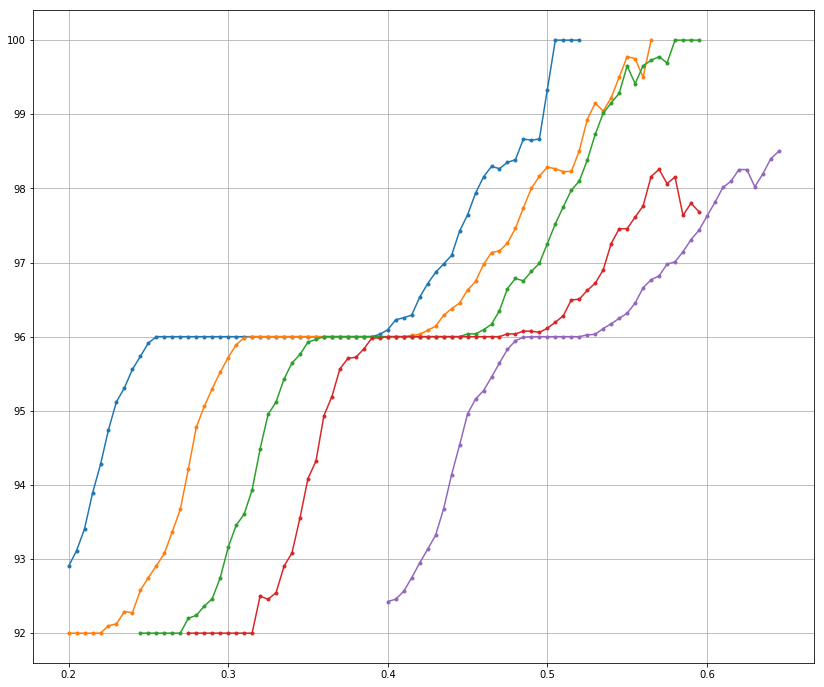

In [98]:
plt.figure(figsize=(14, 12))
plt.grid()
#plt.plot(GC_dataC2CP250_8[4],GC_dataC2CP250_8[0])
plt.plot(GC_dataC2C_corr[0][4],GC_dataC2C_corr[0][0],'.-')
plt.plot(GC_dataC2C_corr[1][4],GC_dataC2C_corr[1][0],'.-')
plt.plot(GC_dataC2C_corr[2][4],GC_dataC2C_corr[2][0],'.-')
plt.plot(GC_dataC2C_corr[3][4],GC_dataC2C_corr[3][0],'.-')
#plt.plot(GC_dataC2CP450_corr[4],GC_dataC2CP450_corr[0],'.-')
#plt.plot(GC_dataC2CP450_OPT_corr[4],GC_dataC2CP450_OPT_corr[0],'.-')
plt.plot(GC_dataC2CP500_corr[4],GC_dataC2CP500_corr[0],'.-')
#plt.plot(GC_dataC2CP550_corr[4],GC_dataC2CP550_corr[0],'.-')

#for i in range(3):
#    plt.plot(GC_dataPc48_corr[i][4],GC_dataPc48_corr[i][0]) #corrected with sigma in the fit
#    plt.plot(GC_dataPc48_corr_ns[i][4],GC_dataPc48_corr_ns[i][0])#corrected without sigma in the fit


# Twist Density correction

In [122]:
dVs_C2CP250=numpy.load('/local/home/vgorelov/Documents/Thesis/IDEAL/C2CP250/C2cp250_density/dVs_C2CP250.npy')
dVs_C2CP300=numpy.load('/local/home/vgorelov/Documents/Thesis/IDEAL/C2CP250/C2cp250_density/dVs_C2CP300.npy')


In [123]:
dVs_C2CP250.shape

(2, 256)

In [34]:
def dvszoom(dvs,shape):
    tmp=numpy.zeros(shape)
    tmp[shape[0]/2-1]=tmp[shape[0]/2-1]+dvs[1]
    tmp[shape[0]/2+1]=tmp[shape[0]/2+1]+dvs[0]
    return tmp


In [35]:
def getmu(data):
    mum=data[4][numpy.where(data[0]==96.)[0][0]]*eV
    mup=data[4][numpy.where(data[0]==96.)[0][-1]]*eV
    return mum,mup,mup-mum

In [52]:
GC_dataC2CP250_8_noc=GC_QMC(dataC2CP250_8,VdataC2CP250_8,0.1,0.6,0.005,256,8)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: Mean of empty slice


In [50]:
GC_dataC2CP250_8dvs=GC_QMC(dataC2CP250_8+numpy.transpose(numpy.tile(CorrC2CP250_8[:,0]*2,(256,1)))+dvszoom(dVs_C2CP250,dataC2CP250_8.shape),VdataC2CP250_8,0.1,0.5,0.005,256,8)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: Mean of empty slice


In [452]:
CorrC2C.shape

(4, 7, 2)

In [46]:
GC_dataC2CP300_dvs=GC_QMC(dataC2C[1]+numpy.transpose(numpy.tile(CorrC2C[1,:,0]*2,(256,1)))+dvszoom(dVs_C2CP300,dataC2C[1].shape),VdataC2C[1],0.1,0.6,0.003,256)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: Mean of empty slice


In [28]:
GC_dataC2CP300_8corr=GC_QMC(dataC2CP300_8+numpy.transpose(numpy.tile(CorrC2CP300_8[:,0]*2,(108,1))),VdataC2CP300_8,0.1,0.6,0.004,108,8)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: Mean of empty slice


In [32]:
GC_dataC2CP300_8_noc=GC_QMC(dataC2CP300_8,VdataC2CP300_8,0.1,0.6,0.004,108,8)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: Mean of empty slice


In [38]:
GC_dataC2CP300_noc=GC_QMC(dataC2C[1],VdataC2C[1],0.1,0.6,0.004,256)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: Mean of empty slice


In [81]:
#numpy.savetxt('GC_dataC2C250_8corrdVs.out',numpy.asarray(GC_dataC2CP250_8dvs))
numpy.savetxt('GC_dataC2C300_corrdVs.out',numpy.asarray(GC_dataC2CP300_dvs))

In [153]:
numpy.savetxt('dataC2C300_corr.out',dataC2C[1]+numpy.transpose(numpy.tile(CorrC2C[1,:,0]*2,(256,1))))
numpy.savetxt('VdataC2C300.out',VdataC2C[1])


In [ ]:
numpy.savetxt('GC_dataC2C300_8corr.out',numpy.asarray(GC_dataC2CP300_8corr))


In [54]:
getmu(GC_dataC2CP250_8dvs)

(7.074964000000003, 10.612446000000007, 3.5374820000000042)

In [53]:
getmu(GC_dataC2CP250_8_noc)

(7.074964000000003, 10.204275000000006, 3.129311000000003)

In [49]:
getmu(GC_dataC2CP300_8corr)

(8.489956800000005, 11.319942400000008, 2.8299856000000023)

In [47]:
getmu(GC_dataC2CP300_dvs)

(8.598802400000006, 11.211096800000007, 2.6122944000000015)

In [39]:
getmu(GC_dataC2CP300_noc)

(8.598802400000006, 10.993405600000008, 2.3946032000000024)

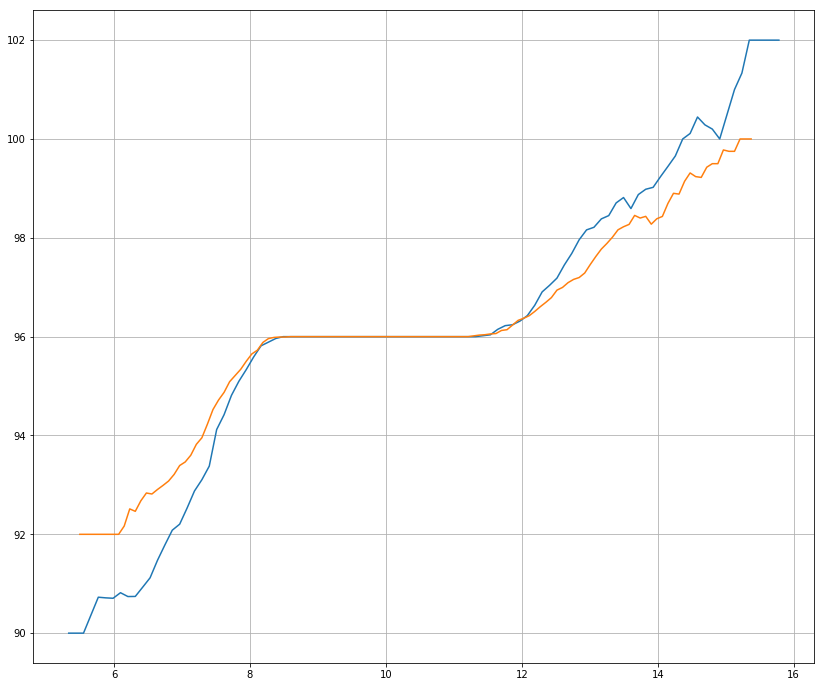

In [78]:
plt.figure(figsize=(14, 12))
plt.grid()
#plt.plot(GC_dataC2CP250_8[4]*eV,GC_dataC2CP250_8[0])
#plt.plot(GC_dataC2CP250_8dvs[4]*eV,GC_dataC2CP250_8dvs[0])
#plt.plot(GC_dataC2CP250_8_noc[4]*eV,GC_dataC2CP250_8_noc[0])

plt.plot(GC_dataC2CP300_8corr[4]*eV,GC_dataC2CP300_8corr[0])
#plt.plot(GC_dataC2CP300_8_noc[4]*eV,GC_dataC2CP300_8_noc[0])
plt.plot(GC_dataC2CP300_dvs[4]*eV,GC_dataC2CP300_dvs[0])

#plt.plot(GC_dataC2C_corr[1][4]*eV,GC_dataC2C_corr[1][0])
#plt.ylim(95,97)
#plt.xlim(8,12)

# Sand box

In [254]:
DeltaSplus  = numpy.asarray((numpy.average(ScordataC2C,axis=2)[4,:200]-numpy.average(ScordataC2C,axis=2)[3,:200],
              numpy.sqrt((numpy.var(ScordataC2C,axis=2)[4,:200]+numpy.var(ScordataC2C,axis=2)[3,:200])/107.)))
DeltaSminus = numpy.asarray((numpy.average(ScordataC2C,axis=2)[2,:200]-numpy.average(ScordataC2C,axis=2)[3,:200],
              numpy.sqrt((numpy.var(ScordataC2C,axis=2)[2,:200]+numpy.var(ScordataC2C,axis=2)[4,:200])/107.)))

In [255]:
Delta4Splus  = numpy.asarray((numpy.average(ScordataC2C,axis=2)[5,:200]-numpy.average(ScordataC2C,axis=2)[3,:200],
              numpy.sqrt((numpy.var(ScordataC2C,axis=2)[5,:200]+numpy.var(ScordataC2C,axis=2)[3,:200])/107.)))
Delta4Sminus = numpy.asarray((numpy.average(ScordataC2C,axis=2)[1,:200]-numpy.average(ScordataC2C,axis=2)[3,:200],
              numpy.sqrt((numpy.var(ScordataC2C,axis=2)[1,:200]+numpy.var(ScordataC2C,axis=2)[3,:200])/107.)))


In [266]:
Delta6Splus  = numpy.asarray((numpy.average(ScordataC2C,axis=2)[6,:200]-numpy.average(ScordataC2C,axis=2)[3,:200],
              numpy.sqrt((numpy.var(ScordataC2C,axis=2)[6,:200]+numpy.var(ScordataC2C,axis=2)[3,:200])/107.)))
Delta6Sminus = numpy.asarray((numpy.average(ScordataC2C,axis=2)[0,:200]-numpy.average(ScordataC2C,axis=2)[3,:200],
              numpy.sqrt((numpy.var(ScordataC2C,axis=2)[0,:200]+numpy.var(ScordataC2C,axis=2)[3,:200])/107.)))


In [275]:
numpy.where(Kgrid<1.5)[0]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [479]:

fit_DSplus=curve_fit(Quad,Kgrid[:17],DeltaSplus[0,:17],sigma=DeltaSplus[1,:17])
fit_DSminus=curve_fit(Quad,Kgrid[:17],DeltaSminus[0,:17],sigma=DeltaSminus[1,:17])
fit_DSplus_l=curve_fit(line,Kgrid[:16]**2,DeltaSplus[0,:16],sigma=DeltaSplus[1,:16])
fit_DSminus_l=curve_fit(line,Kgrid[:16]**2,DeltaSminus[0,:16],sigma=DeltaSminus[1,:16])


In [613]:
print getSizeCorr(numpy.zeros(20),Kgrid[:20],1.5,vmadC2CP250)#,Sigma=DeltaSplus[1,:20])

[ 0. nan]


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


In [532]:
0.10693144*vmad*eV/2.

0.413185094471072

In [480]:
print fit_DSplus_l
print fit_DSminus_l

(array([0.10693144, 0.3231788 ]), array([[ 0.00263512, -0.00199996],
       [-0.00199996,  0.00216397]]))
(array([ 0.10253222, -0.29703951]), array([[ 0.00259645, -0.00196306],
       [-0.00196306,  0.00210593]]))


In [48]:
vmadCMCA12P400

0.28582029202088827

In [52]:
tmpP250p=getSizeCorrPlot((numpy.average(ScordataC2CP250_8,axis=2)[3,:200]-numpy.average(ScordataC2CP250_8,axis=2)[4,:200]),
                           KgridP250_8,cutoff=2,vmad=vmadC2CP250,
                           Sigma=numpy.sqrt((numpy.var(ScordataC2CP250_8,axis=2)[3,:200]+numpy.var(ScordataC2CP250_8,axis=2)[4,:200])/107.))
tmpP250m=getSizeCorrPlot((numpy.average(ScordataC2CP250_8,axis=2)[5,:200]-numpy.average(ScordataC2CP250_8,axis=2)[4,:200]),
                           KgridP250_8,cutoff=2,vmad=vmadC2CP250,
                           Sigma=numpy.sqrt((numpy.var(ScordataC2CP250_8,axis=2)[5,:200]+numpy.var(ScordataC2CP250_8,axis=2)[4,:200])/107.))


In [93]:
print tmpP250m[0][0]+tmpP250p[0][0], numpy.sqrt(tmpP250m[1][0,0]+tmpP250p[1][0,0])
print tmpP300_Lm[0][0]+tmpP300_Lp[0][0], numpy.sqrt(tmpP300_Lm[1][0,0]+tmpP300_Lp[1][0,0])


0.10641997459769305 0.03614277753694965
0.06287167835460089 0.05202701510448473


In [53]:
tmpP300_Lp=getSizeCorrPlot((numpy.average(ScordataC2CP300_L,axis=2)[2,:200]-numpy.average(ScordataC2CP300_L,axis=2)[3,:200]),
                           KgridP300_L,cutoff=2,vmad=vmadC2CP300,
                           Sigma=numpy.sqrt((numpy.var(ScordataC2CP300_L,axis=2)[2,:200]+numpy.var(ScordataC2CP300_L,axis=2)[3,:200])/107.))
tmpP300_Lm=getSizeCorrPlot((numpy.average(ScordataC2CP300_L,axis=2)[4,:200]-numpy.average(ScordataC2CP300_L,axis=2)[3,:200]),
                           KgridP300_L,cutoff=2,vmad=vmadC2CP300,
                           Sigma=numpy.sqrt((numpy.var(ScordataC2CP300_L,axis=2)[3,:200]+numpy.var(ScordataC2CP300_L,axis=2)[4,:200])/107.))

In [221]:
tmpP350p=getSizeCorrPlot((numpy.average(ScordataC2CP350,axis=2)[2,:200]-numpy.average(ScordataC2CP350,axis=2)[3,:200]),
                           KgridP350,cutoff=2,vmad=vmadC2CP350,
                           Sigma=numpy.sqrt((numpy.var(ScordataC2CP350,axis=2)[2,:200]+numpy.var(ScordataC2CP350,axis=2)[3,:200])/107.))
tmpP350m=getSizeCorrPlot((numpy.average(ScordataC2CP350,axis=2)[4,:200]-numpy.average(ScordataC2CP350,axis=2)[3,:200]),
                           KgridP350,cutoff=2,vmad=vmadC2CP350,
                           Sigma=numpy.sqrt((numpy.var(ScordataC2CP350,axis=2)[3,:200]+numpy.var(ScordataC2CP350,axis=2)[4,:200])/107.))

In [222]:
tmpP400p=getSizeCorrPlot((numpy.average(ScordataC2CP400,axis=2)[2,:200]-numpy.average(ScordataC2CP400,axis=2)[3,:200]),
                           KgridP400,cutoff=2,vmad=vmadC2CP400,
                           Sigma=numpy.sqrt((numpy.var(ScordataC2CP400,axis=2)[2,:200]+numpy.var(ScordataC2CP400,axis=2)[3,:200])/107.))
tmpP400m=getSizeCorrPlot((numpy.average(ScordataC2CP400,axis=2)[4,:200]-numpy.average(ScordataC2CP400,axis=2)[3,:200]),
                           KgridP400,cutoff=2,vmad=vmadC2CP400,
                           Sigma=numpy.sqrt((numpy.var(ScordataC2CP400,axis=2)[3,:200]+numpy.var(ScordataC2CP400,axis=2)[4,:200])/107.))

In [345]:
tmpP450p=getSizeCorrPlot((numpy.average(ScordataC2CP450,axis=2)[2,:200]-numpy.average(ScordataC2CP450,axis=2)[3,:200]),
                           KgridC2CP450,cutoff=1.5,vmad=vmadC2CP450,
                           Sigma=numpy.sqrt((numpy.var(ScordataC2CP450,axis=2)[2,:200]+numpy.var(ScordataC2CP450,axis=2)[3,:200])/107.))
tmpP450m=getSizeCorrPlot((numpy.average(ScordataC2CP450,axis=2)[4,:200]-numpy.average(ScordataC2CP450,axis=2)[3,:200]),
                           KgridC2CP450,cutoff=1.5,vmad=vmadC2CP450,
                           Sigma=numpy.sqrt((numpy.var(ScordataC2CP450,axis=2)[3,:200]+numpy.var(ScordataC2CP450,axis=2)[4,:200])/107.))

In [90]:
tmpP500p=getSizeCorrPlot((numpy.average(ScordataC2CP500,axis=2)[2,:200]-numpy.average(ScordataC2CP500,axis=2)[3,:200]),
                           KgridC2CP500,cutoff=1.5,vmad=vmadC2CP500,
                           Sigma=numpy.sqrt((numpy.var(ScordataC2CP500,axis=2)[2,:200]+numpy.var(ScordataC2CP500,axis=2)[3,:200])/107.))
tmpP500m=getSizeCorrPlot((numpy.average(ScordataC2CP500,axis=2)[4,:200]-numpy.average(ScordataC2CP500,axis=2)[3,:200]),
                           KgridC2CP500,cutoff=1.5,vmad=vmadC2CP500,
                           Sigma=numpy.sqrt((numpy.var(ScordataC2CP500,axis=2)[3,:200]+numpy.var(ScordataC2CP500,axis=2)[4,:200])/107.))

In [386]:
tmpP550p=getSizeCorrPlot((numpy.average(ScordataC2CP550,axis=2)[2,:200]-numpy.average(ScordataC2CP550,axis=2)[3,:200]),
                           KgridC2CP550,cutoff=1.5,vmad=vmadC2CP550,
                           Sigma=numpy.sqrt((numpy.var(ScordataC2CP550,axis=2)[2,:200]+numpy.var(ScordataC2CP550,axis=2)[3,:200])/107.))
tmpP550m=getSizeCorrPlot((numpy.average(ScordataC2CP550,axis=2)[4,:200]-numpy.average(ScordataC2CP550,axis=2)[3,:200]),
                           KgridC2CP550,cutoff=1.5,vmad=vmadC2CP550,
                           Sigma=numpy.sqrt((numpy.var(ScordataC2CP550,axis=2)[3,:200]+numpy.var(ScordataC2CP550,axis=2)[4,:200])/107.))

In [30]:
tmpP250m[0][0]+tmpP250p[0][0]

0.12202280478394167

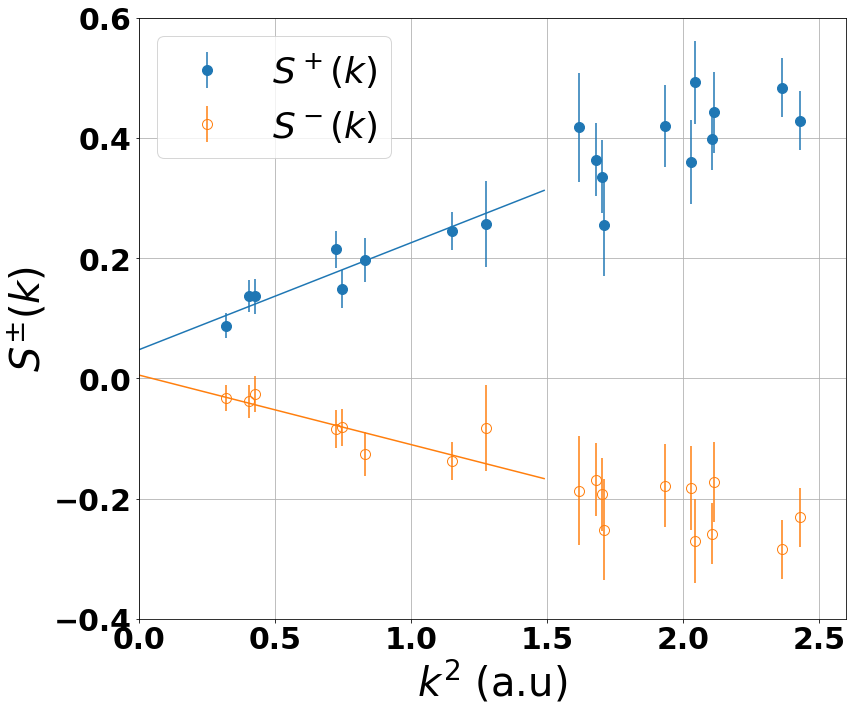

In [72]:
plt.figure(figsize=(12, 10))

#plt.tick_params(labelsize='large')
plt.ylabel("$S^{\pm}(k)$", fontsize=40)
plt.xticks(fontsize=30,fontweight='bold')
plt.yticks(fontsize=30,fontweight='bold')
plt.grid()
plt.xlabel('$k^2$ (a.u)', fontsize=40)
plotGrid=numpy.arange(0,1.5,0.01)

#plt.plot(plotGrid,line(plotGrid,*linfit[0]),color='#ff7f0e')

#plt.errorbar(KgridP3\Delta 00[:90],1-((numpy.average(ScordataC2CP250_L,axis=2)[4,:90]/96.)*2*wp/KgridP250_L[:90]**2)**2,
#             fmt='o',color='#ff7f0e')f

plt.errorbar(KgridP250_8[:120]**2,(numpy.average(ScordataC2CP250_8,axis=2)[5,:120]-numpy.average(ScordataC2CP250_8,axis=2)[4,:120])/2,
             yerr=numpy.sqrt((numpy.var(ScordataC2CP250_8,axis=2)[4,:120]+numpy.var(ScordataC2CP250_8,axis=2)[5,:120])/255.),fmt='o',markersize=10,color='#1f77b4')
plt.errorbar(KgridP250_8[:120]**2,(numpy.average(ScordataC2CP250_8,axis=2)[3,:120]-numpy.average(ScordataC2CP250_8,axis=2)[4,:120])/2,
             yerr=numpy.sqrt((numpy.var(ScordataC2CP250_8,axis=2)[4,:120]+numpy.var(ScordataC2CP250_8,axis=2)[5,:120])/255.),fmt='o',fillstyle='none',markersize=10,color='#ff7f0e')
plt.legend(['$S^+(k)$','$S^-(k)$'],fontsize=36)
plt.plot(plotGrid,line(plotGrid,*tmpP250m[0]/2),color='#1f77b4')
plt.plot(plotGrid,line(plotGrid,*tmpP250p[0]/2),color='#ff7f0e')


plt.xlim(0,2.6)
plt.ylim(-.4,.6)

#plt.plot([0,1],[linfitP250[0][0]/2,linfitP250[0][0]/2])
plt.tight_layout()
#plt.savefig('/local/home/vgorelov/Documents/Thesis/Soff_C2cp250_8.pdf',dpi=300,format='pdf')


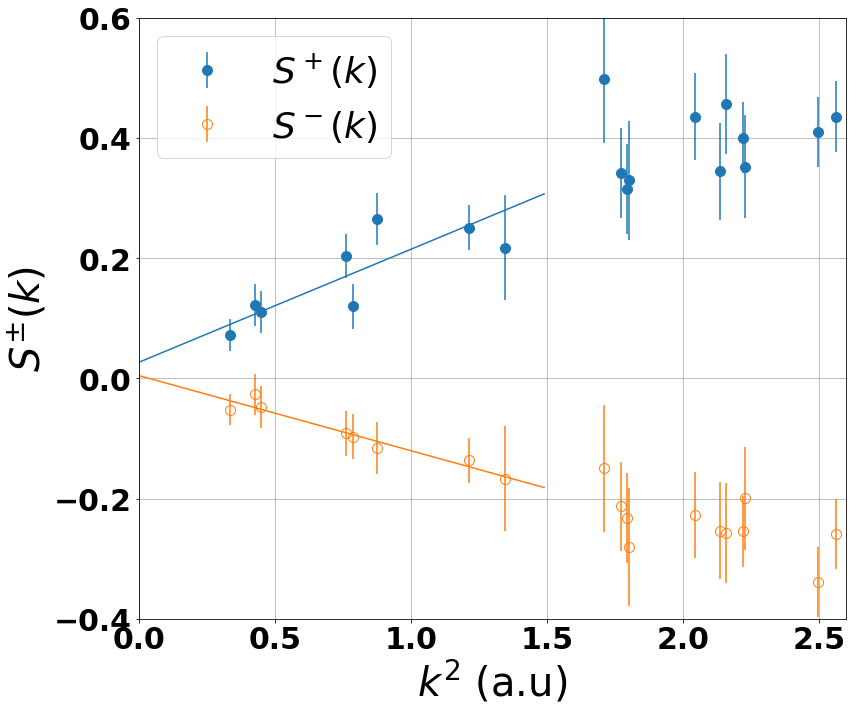

In [75]:
plt.figure(figsize=(12, 10))
#plt.tick_params(labelsize='large')
plt.ylabel("$S^{\pm}(k)$", fontsize=40)
plt.xticks(fontsize=30,fontweight='bold')
plt.yticks(fontsize=30,fontweight='bold')
plt.grid()
plt.xlabel('$k^2$ (a.u)', fontsize=40)
plotGrid=numpy.arange(0,1.5,0.01)

#plt.plot(plotGrid,line(plotGrid,*linfit[0]),color='#ff7f0e')

#plt.errorbar(KgridP3\Delta 00[:90],1-((numpy.average(ScordataC2CP300_L,axis=2)[4,:90]/96.)*2*wp/KgridP300_L[:90]**2)**2,
#             fmt='o',color='#ff7f0e')

plt.errorbar(KgridP300_L[:60]**2,(numpy.average(ScordataC2CP300_L,axis=2)[4,:60]-numpy.average(ScordataC2CP300_L,axis=2)[3,:60])/2,
             yerr=numpy.sqrt((numpy.var(ScordataC2CP300_L,axis=2)[4,:60]+numpy.var(ScordataC2CP300_L,axis=2)[5,:60])/255.),fmt='o',markersize=10,color='#1f77b4')
plt.errorbar(KgridP300_L[:60]**2,(numpy.average(ScordataC2CP300_L,axis=2)[2,:60]-numpy.average(ScordataC2CP300_L,axis=2)[3,:60])/2,
             yerr=numpy.sqrt((numpy.var(ScordataC2CP300_L,axis=2)[4,:60]+numpy.var(ScordataC2CP300_L,axis=2)[5,:60])/255.),fmt='o',fillstyle='none',markersize=10,color='#ff7f0e')

plt.legend(['$S^+(k)$','$S^-(k)$'],fontsize=36)

plt.plot(plotGrid,line(plotGrid,*tmpP300_Lm[0])/2,color='#1f77b4')
plt.plot(plotGrid,line(plotGrid,*tmpP300_Lp[0])/2,color='#ff7f0e')

plt.xlim(0,2.6)
plt.ylim(-.4,.6)

#plt.plot([0,1],[linfitP300[0][0]/2,linfitP300[0][0]/2])
plt.tight_layout()
#plt.savefig('/local/home/vgorelov/Documents/Thesis/Soff_C2cp300_L.pdf',dpi=300,format='pdf')


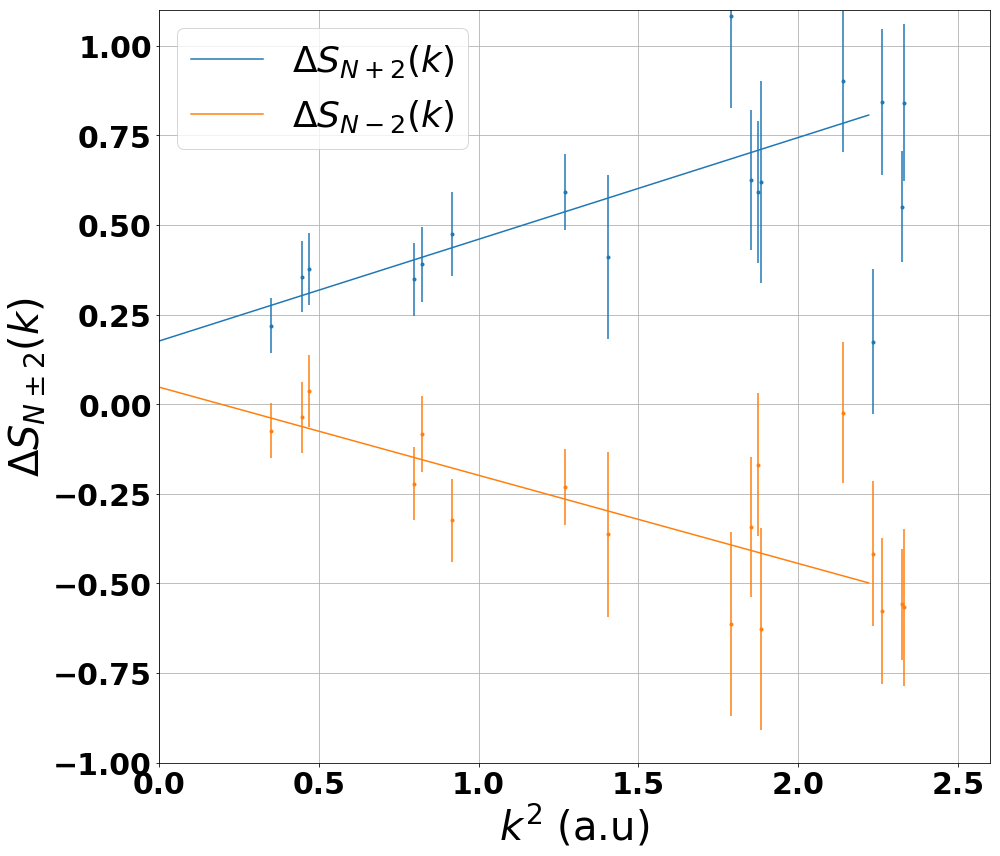

In [226]:
plt.figure(figsize=(14, 12))
#plt.tick_params(labelsize='large')
plt.ylabel("$\Delta S_{N \pm 2}(k)$", fontsize=40)
plt.xticks(fontsize=30,fontweight='bold')
plt.yticks(fontsize=30,fontweight='bold')
plt.grid()
plt.xlabel('$k^2$ (a.u)', fontsize=40)
plotGrid=numpy.arange(0,1.5,0.01)

#plt.plot(plotGrid,line(plotGrid,*linfit[0]),color='#ff7f0e')
plt.plot(plotGrid**2,line(plotGrid**2,*tmpP350m[0]),color='#1f77b4')
plt.plot(plotGrid**2,line(plotGrid**2,*tmpP350p[0]),color='#ff7f0e')
plt.legend(['$\Delta S_{N+2}(k)$','$\Delta S_{N-2}(k)$'],fontsize=36)

#plt.errorbar(KgridP3\Delta 00[:90],1-((numpy.average(ScordataC2CP350,axis=2)[4,:90]/96.)*2*wp/KgridP350[:90]**2)**2,
#             fmt='o',color='#ff7f0e')
plt.errorbar(KgridP350[:60]**2,(numpy.average(ScordataC2CP350,axis=2)[2,:60]-numpy.average(ScordataC2CP350,axis=2)[3,:60]),
             yerr=numpy.sqrt((numpy.var(ScordataC2CP350,axis=2)[4,:60]+numpy.var(ScordataC2CP350,axis=2)[5,:60])/107.),fmt='.',color='#ff7f0e')

plt.errorbar(KgridP350[:60]**2,(numpy.average(ScordataC2CP350,axis=2)[4,:60]-numpy.average(ScordataC2CP350,axis=2)[3,:60]),
             yerr=numpy.sqrt((numpy.var(ScordataC2CP350,axis=2)[4,:60]+numpy.var(ScordataC2CP350,axis=2)[5,:60])/107.),fmt='.',color='#1f77b4')
plt.xlim(0,2.6)
plt.ylim(-1,1.1)

plt.tight_layout()

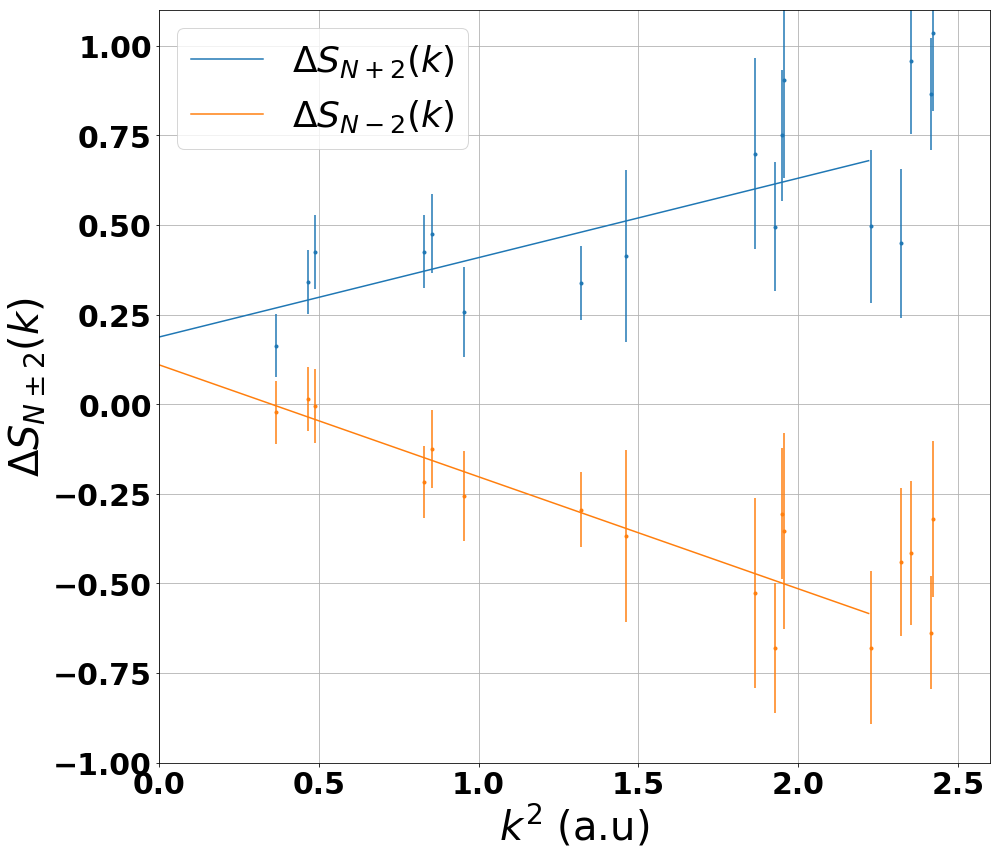

In [227]:
plt.figure(figsize=(14, 12))
#plt.tick_params(labelsize='large')
plt.ylabel("$\Delta S_{N \pm 2}(k)$", fontsize=40)
plt.xticks(fontsize=30,fontweight='bold')
plt.yticks(fontsize=30,fontweight='bold')
plt.grid()
plt.xlabel('$k^2$ (a.u)', fontsize=40)
plotGrid=numpy.arange(0,1.5,0.01)

#plt.plot(plotGrid,line(plotGrid,*linfit[0]),color='#ff7f0e')
plt.plot(plotGrid**2,line(plotGrid**2,*tmpP400m[0]),color='#1f77b4')
plt.plot(plotGrid**2,line(plotGrid**2,*tmpP400p[0]),color='#ff7f0e')
plt.legend(['$\Delta S_{N+2}(k)$','$\Delta S_{N-2}(k)$'],fontsize=36)

#plt.errorbar(KgridP3\Delta 00[:90],1-((numpy.average(ScordataC2CP400,axis=2)[4,:90]/96.)*2*wp/KgridP400[:90]**2)**2,
#             fmt='o',color='#ff7f0e')
plt.errorbar(KgridP400[:60]**2,(numpy.average(ScordataC2CP400,axis=2)[2,:60]-numpy.average(ScordataC2CP400,axis=2)[3,:60]),
             yerr=numpy.sqrt((numpy.var(ScordataC2CP400,axis=2)[4,:60]+numpy.var(ScordataC2CP400,axis=2)[5,:60])/107.),fmt='.',color='#ff7f0e')

plt.errorbar(KgridP400[:60]**2,(numpy.average(ScordataC2CP400,axis=2)[4,:60]-numpy.average(ScordataC2CP400,axis=2)[3,:60]),
             yerr=numpy.sqrt((numpy.var(ScordataC2CP400,axis=2)[4,:60]+numpy.var(ScordataC2CP400,axis=2)[5,:60])/107.),fmt='.',color='#1f77b4')
plt.xlim(0,2.6)
plt.ylim(-1,1.1)

plt.tight_layout()

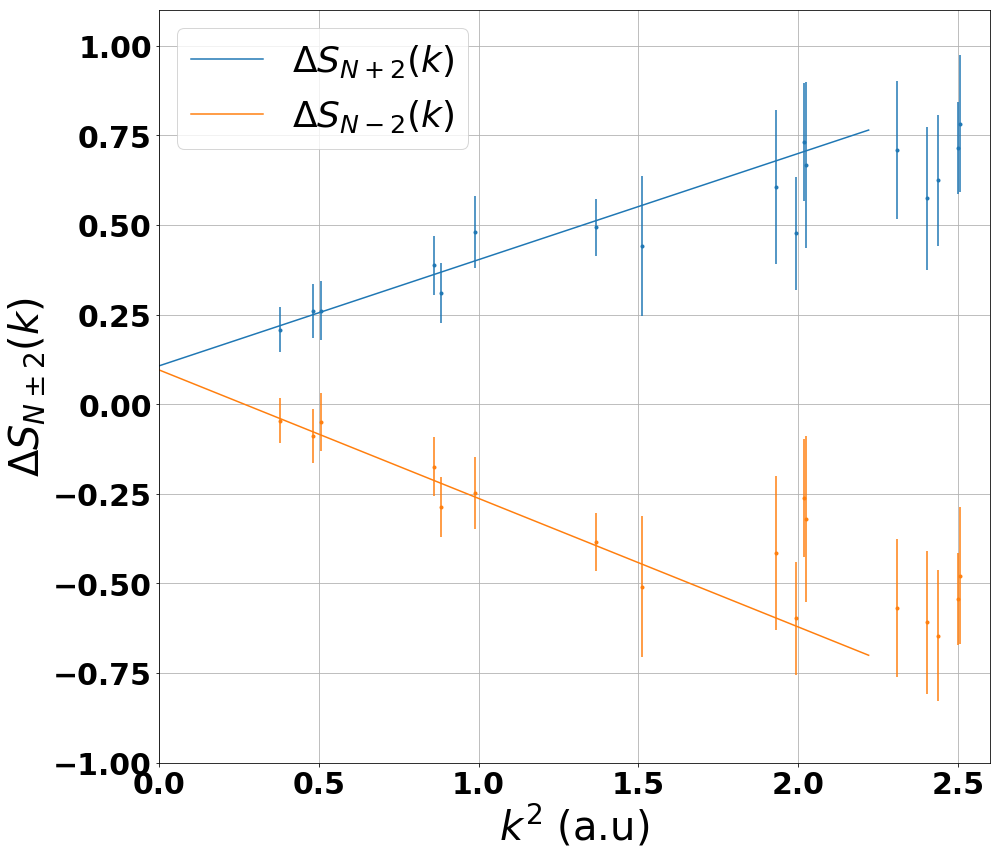

In [346]:
plt.figure(figsize=(14, 12))
#plt.tick_params(labelsize='large')
plt.ylabel("$\Delta S_{N \pm 2}(k)$", fontsize=40)
plt.xticks(fontsize=30,fontweight='bold')
plt.yticks(fontsize=30,fontweight='bold')
plt.grid()
plt.xlabel('$k^2$ (a.u)', fontsize=40)
plotGrid=numpy.arange(0,1.5,0.01)

#plt.plot(plotGrid,line(plotGrid,*linfit[0]),color='#ff7f0e')
plt.plot(plotGrid**2,line(plotGrid**2,*tmpP450m[0]),color='#1f77b4')
plt.plot(plotGrid**2,line(plotGrid**2,*tmpP450p[0]),color='#ff7f0e')
plt.legend(['$\Delta S_{N+2}(k)$','$\Delta S_{N-2}(k)$'],fontsize=36)

#plt.errorbar(KgridP3\Delta 00[:90],1-((numpy.average(ScordataC2CP450,axis=2)[4,:90]/96.)*2*wp/KgridP450[:90]**2)**2,
#             fmt='o',color='#ff7f0e')
plt.errorbar(KgridC2CP450[:60]**2,(numpy.average(ScordataC2CP450,axis=2)[2,:60]-numpy.average(ScordataC2CP450,axis=2)[3,:60]),
             yerr=numpy.sqrt((numpy.var(ScordataC2CP450,axis=2)[4,:60]+numpy.var(ScordataC2CP450,axis=2)[5,:60])/107.),fmt='.',color='#ff7f0e')

plt.errorbar(KgridC2CP450[:60]**2,(numpy.average(ScordataC2CP450,axis=2)[4,:60]-numpy.average(ScordataC2CP450,axis=2)[3,:60]),
             yerr=numpy.sqrt((numpy.var(ScordataC2CP450,axis=2)[4,:60]+numpy.var(ScordataC2CP450,axis=2)[5,:60])/107.),fmt='.',color='#1f77b4')
plt.xlim(0,2.6)
plt.ylim(-1,1.1)

plt.tight_layout()

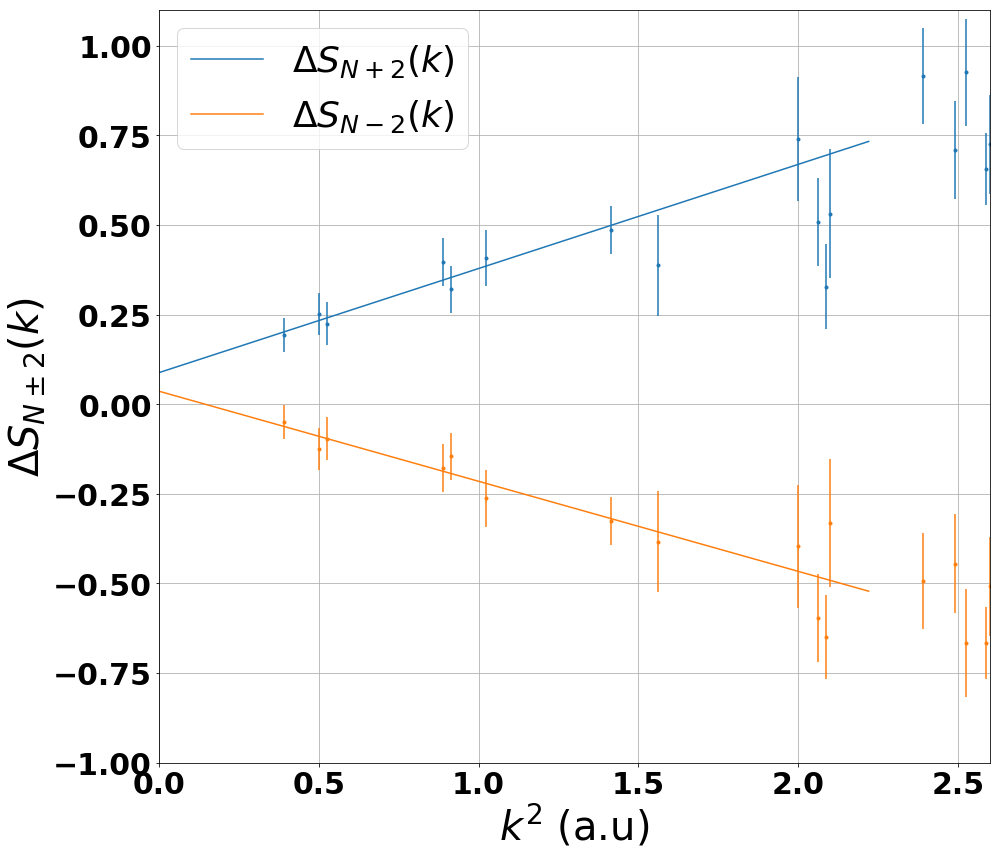

In [91]:
plt.figure(figsize=(14, 12))
#plt.tick_params(labelsize='large')
plt.ylabel("$\Delta S_{N \pm 2}(k)$", fontsize=40)
plt.xticks(fontsize=30,fontweight='bold')
plt.yticks(fontsize=30,fontweight='bold')
plt.grid()
plt.xlabel('$k^2$ (a.u)', fontsize=40)
plotGrid=numpy.arange(0,1.5,0.01)

#plt.plot(plotGrid,line(plotGrid,*linfit[0]),color='#ff7f0e')
plt.plot(plotGrid**2,line(plotGrid**2,*tmpP500m[0]),color='#1f77b4')
plt.plot(plotGrid**2,line(plotGrid**2,*tmpP500p[0]),color='#ff7f0e')
plt.legend(['$\Delta S_{N+2}(k)$','$\Delta S_{N-2}(k)$'],fontsize=36)

#plt.errorbar(KgridP3\Delta 00[:90],1-((numpy.average(ScordataC2CP500,axis=2)[4,:90]/96.)*2*wp/KgridP500[:90]**2)**2,
#             fmt='o',color='#ff7f0e')
plt.errorbar(KgridC2CP500[:60]**2,(numpy.average(ScordataC2CP500,axis=2)[2,:60]-numpy.average(ScordataC2CP500,axis=2)[3,:60]),
             yerr=numpy.sqrt((numpy.var(ScordataC2CP500,axis=2)[4,:60]+numpy.var(ScordataC2CP500,axis=2)[5,:60])/107.),fmt='.',color='#ff7f0e')

plt.errorbar(KgridC2CP500[:60]**2,(numpy.average(ScordataC2CP500,axis=2)[4,:60]-numpy.average(ScordataC2CP500,axis=2)[3,:60]),
             yerr=numpy.sqrt((numpy.var(ScordataC2CP500,axis=2)[4,:60]+numpy.var(ScordataC2CP500,axis=2)[5,:60])/107.),fmt='.',color='#1f77b4')
plt.xlim(0,2.6)
plt.ylim(-1,1.1)

plt.tight_layout()

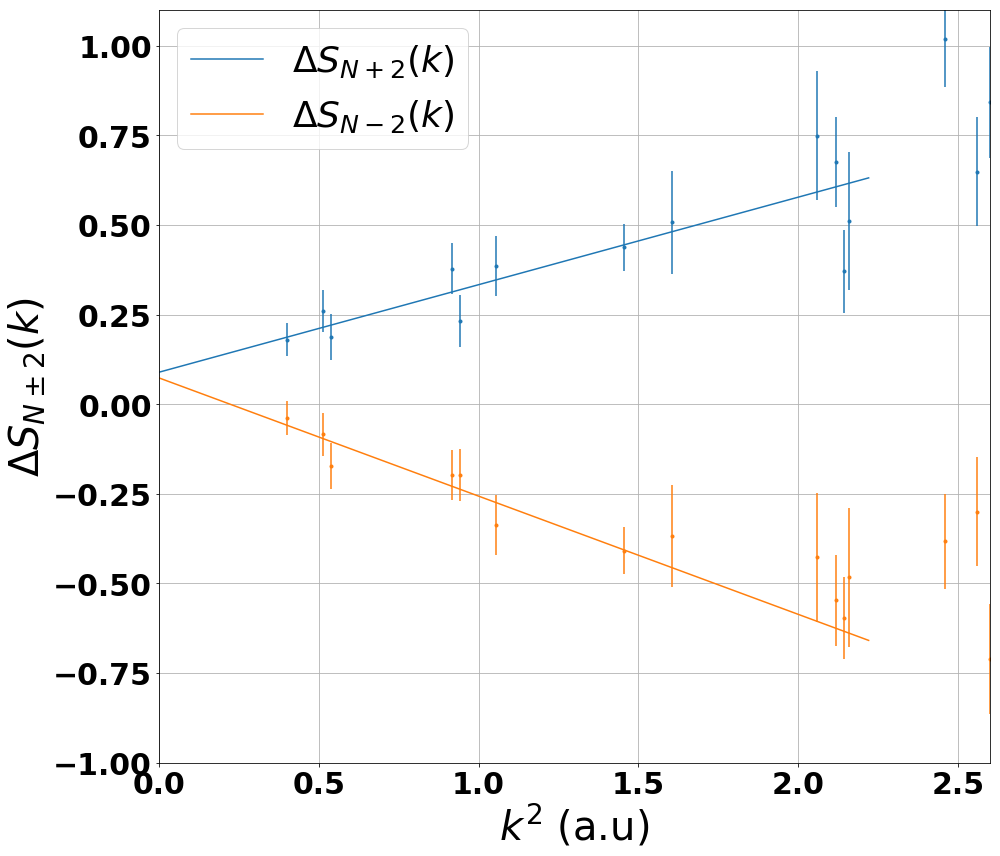

In [387]:
plt.figure(figsize=(14, 12))
#plt.tick_params(labelsize='large')
plt.ylabel("$\Delta S_{N \pm 2}(k)$", fontsize=40)
plt.xticks(fontsize=30,fontweight='bold')
plt.yticks(fontsize=30,fontweight='bold')
plt.grid()
plt.xlabel('$k^2$ (a.u)', fontsize=40)
plotGrid=numpy.arange(0,1.5,0.01)

#plt.plot(plotGrid,line(plotGrid,*linfit[0]),color='#ff7f0e')
plt.plot(plotGrid**2,line(plotGrid**2,*tmpP550m[0]),color='#1f77b4')
plt.plot(plotGrid**2,line(plotGrid**2,*tmpP550p[0]),color='#ff7f0e')
plt.legend(['$\Delta S_{N+2}(k)$','$\Delta S_{N-2}(k)$'],fontsize=36)

#plt.errorbar(KgridP3\Delta 00[:90],1-((numpy.average(ScordataC2CP550,axis=2)[4,:90]/96.)*2*wp/KgridP550[:90]**2)**2,
#             fmt='o',color='#ff7f0e')
plt.errorbar(KgridC2CP550[:60]**2,(numpy.average(ScordataC2CP550,axis=2)[2,:60]-numpy.average(ScordataC2CP550,axis=2)[3,:60]),
             yerr=numpy.sqrt((numpy.var(ScordataC2CP550,axis=2)[4,:60]+numpy.var(ScordataC2CP550,axis=2)[5,:60])/107.),fmt='.',color='#ff7f0e')

plt.errorbar(KgridC2CP550[:60]**2,(numpy.average(ScordataC2CP550,axis=2)[4,:60]-numpy.average(ScordataC2CP550,axis=2)[3,:60]),
             yerr=numpy.sqrt((numpy.var(ScordataC2CP550,axis=2)[4,:60]+numpy.var(ScordataC2CP550,axis=2)[5,:60])/107.),fmt='.',color='#1f77b4')
plt.xlim(0,2.6)
plt.ylim(-1,1.1)

plt.tight_layout()

In [320]:
tmpP250p=getSizeCorrPlot((numpy.average(ScordataCMCA12P250,axis=2)[2,:200]-numpy.average(ScordataCMCA12P250,axis=2)[3,:200]),
                           KgridP250,cutoff=1.5,vmad=vmadCMCA12P250,
                           Sigma=numpy.sqrt((numpy.var(ScordataCMCA12P250,axis=2)[2,:200]+numpy.var(ScordataCMCA12P250,axis=2)[3,:200])/107.))
tmpP250m=getSizeCorrPlot((numpy.average(ScordataCMCA12P250,axis=2)[4,:200]-numpy.average(ScordataCMCA12P250,axis=2)[3,:200]),
                           KgridP250,cutoff=1.5,vmad=vmadCMCA12P250,
                           Sigma=numpy.sqrt((numpy.var(ScordataCMCA12P250,axis=2)[4,:200]+numpy.var(ScordataCMCA12P250,axis=2)[3,:200])/107.))

tmpP300p=getSizeCorrPlot((numpy.average(ScordataCMCA12P300,axis=2)[2,:200]-numpy.average(ScordataCMCA12P300,axis=2)[3,:200]),
                           KgridP300,cutoff=1.5,vmad=vmadCMCA12P300,
                           Sigma=numpy.sqrt((numpy.var(ScordataCMCA12P300,axis=2)[2,:200]+numpy.var(ScordataCMCA12P300,axis=2)[3,:200])/107.))
tmpP300m=getSizeCorrPlot((numpy.average(ScordataCMCA12P300,axis=2)[4,:200]-numpy.average(ScordataCMCA12P300,axis=2)[3,:200]),
                           KgridP300,cutoff=1.5,vmad=vmadCMCA12P300,
                           Sigma=numpy.sqrt((numpy.var(ScordataCMCA12P300,axis=2)[3,:200]+numpy.var(ScordataCMCA12P300,axis=2)[4,:200])/107.))

tmpP350p=getSizeCorrPlot((numpy.average(ScordataCMCA12P350,axis=2)[2,:200]-numpy.average(ScordataCMCA12P350,axis=2)[3,:200]),
                           KgridP350,cutoff=2.5,vmad=vmadCMCA12P350,
                           Sigma=numpy.sqrt((numpy.var(ScordataCMCA12P350,axis=2)[2,:200]+numpy.var(ScordataCMCA12P350,axis=2)[3,:200])/107.))
tmpP350m=getSizeCorrPlot((numpy.average(ScordataCMCA12P350,axis=2)[4,:200]-numpy.average(ScordataCMCA12P350,axis=2)[3,:200]),
                           KgridP350,cutoff=2.5,vmad=vmadCMCA12P350,
                           Sigma=numpy.sqrt((numpy.var(ScordataCMCA12P350,axis=2)[3,:200]+numpy.var(ScordataCMCA12P350,axis=2)[4,:200])/107.))

tmpP400p=getSizeCorrPlot((numpy.average(ScordataCMCA12P400,axis=2)[2,:200]-numpy.average(ScordataCMCA12P400,axis=2)[3,:200]),
                           KgridP400,cutoff=2,vmad=vmadCMCA12P400,
                           Sigma=numpy.sqrt((numpy.var(ScordataCMCA12P400,axis=2)[2,:200]+numpy.var(ScordataCMCA12P400,axis=2)[3,:200])/107.))
tmpP400m=getSizeCorrPlot((numpy.average(ScordataCMCA12P400,axis=2)[4,:200]-numpy.average(ScordataCMCA12P400,axis=2)[3,:200]),
                           KgridP400,cutoff=2,vmad=vmadCMCA12P400,
                           Sigma=numpy.sqrt((numpy.var(ScordataCMCA12P400,axis=2)[3,:200]+numpy.var(ScordataCMCA12P400,axis=2)[4,:200])/107.))

NameError: name 'KgridP250' is not defined

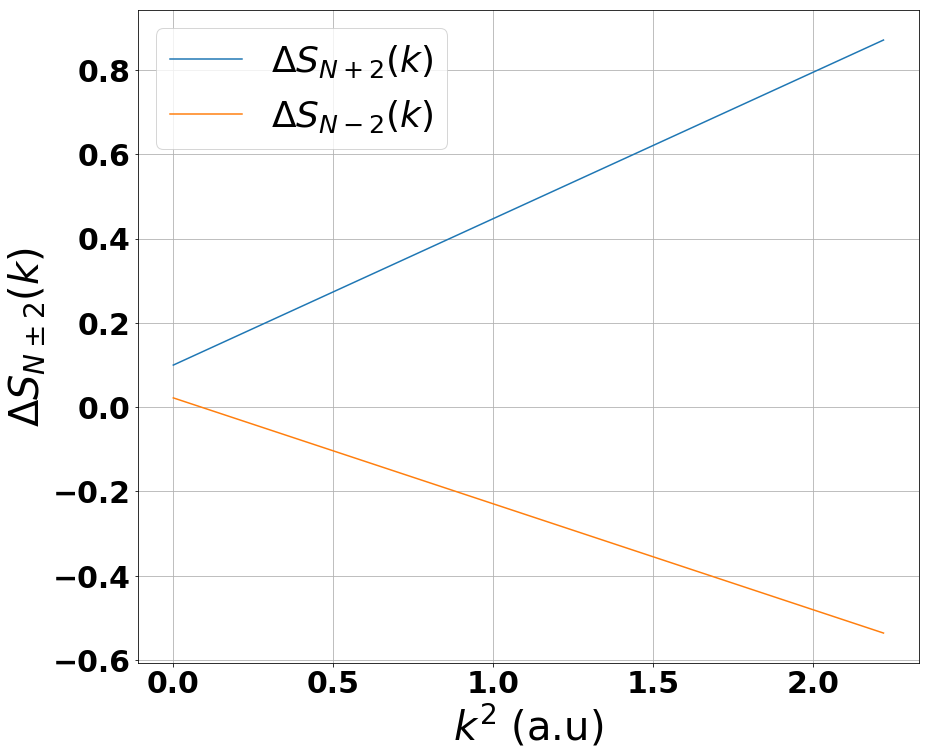

In [26]:
plt.figure(figsize=(14, 12))
#plt.tick_params(labelsize='large')
plt.ylabel("$\Delta S_{N \pm 2}(k)$", fontsize=40)
plt.xticks(fontsize=30,fontweight='bold')
plt.yticks(fontsize=30,fontweight='bold')
plt.grid()
plt.xlabel('$k^2$ (a.u)', fontsize=40)
plotGrid=numpy.arange(0,1.5,0.01)

#plt.plot(plotGrid,line(plotGrid,*linfit[0]),color='#ff7f0e')
plt.plot(plotGrid**2,line(plotGrid**2,*tmpP250m[0]),color='#1f77b4')
plt.plot(plotGrid**2,line(plotGrid**2,*tmpP250p[0]),color='#ff7f0e')
plt.legend(['$\Delta S_{N+2}(k)$','$\Delta S_{N-2}(k)$'],fontsize=36)

#plt.errorbar(KgridP3\Delta 00[:90],1-((numpy.average(ScordataCMCA12P250_L,axis=2)[4,:90]/96.)*2*wp/KgridP250_L[:90]**2)**2,
#             fmt='o',color='#ff7f0e')
plt.errorbar(KgridP250[:60]**2,(numpy.average(ScordataCMCA12P250,axis=2)[2,:60]-numpy.average(ScordataCMCA12P250,axis=2)[3,:60]),
             yerr=numpy.sqrt((numpy.var(ScordataCMCA12P250,axis=2)[2,:60]+numpy.var(ScordataCMCA12P250,axis=2)[3,:60])/107.),fmt='.',color='#ff7f0e')

plt.errorbar(KgridP250[:60]**2,(numpy.average(ScordataCMCA12P250,axis=2)[4,:60]-numpy.average(ScordataCMCA12P250,axis=2)[3,:60]),
             yerr=numpy.sqrt((numpy.var(ScordataCMCA12P250,axis=2)[4,:60]+numpy.var(ScordataCMCA12P250,axis=2)[3,:60])/107.),fmt='.',color='#1f77b4')
plt.xlim(0,2.6)
plt.ylim(-1,1.1)

plt.tight_layout()

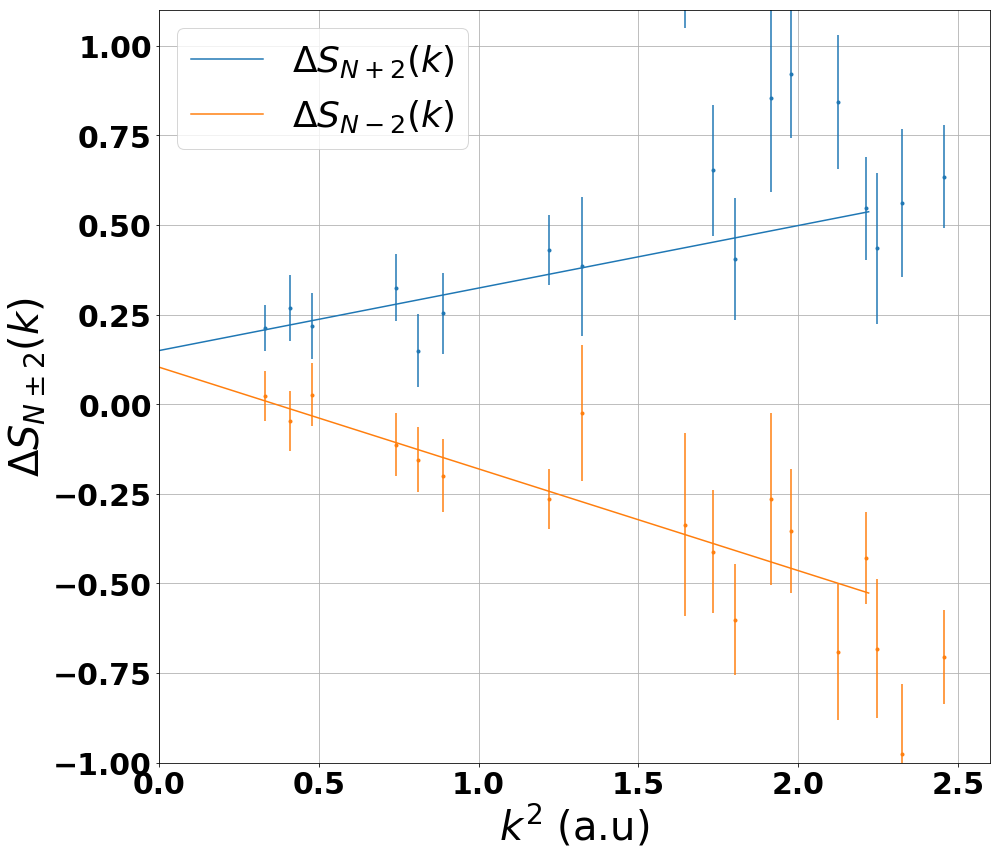

In [314]:
plt.figure(figsize=(14, 12))
#plt.tick_params(labelsize='large')
plt.ylabel("$\Delta S_{N \pm 2}(k)$", fontsize=40)
plt.xticks(fontsize=30,fontweight='bold')
plt.yticks(fontsize=30,fontweight='bold')
plt.grid()
plt.xlabel('$k^2$ (a.u)', fontsize=40)
plotGrid=numpy.arange(0,1.5,0.01)

#plt.plot(plotGrid,line(plotGrid,*linfit[0]),color='#ff7f0e')
plt.plot(plotGrid**2,line(plotGrid**2,*tmpP300m[0]),color='#1f77b4')
plt.plot(plotGrid**2,line(plotGrid**2,*tmpP300p[0]),color='#ff7f0e')
plt.legend(['$\Delta S_{N+2}(k)$','$\Delta S_{N-2}(k)$'],fontsize=36)

plt.errorbar(KgridP300[:60]**2,(numpy.average(ScordataCMCA12P300,axis=2)[2,:60]-numpy.average(ScordataCMCA12P300,axis=2)[3,:60]),
             yerr=numpy.sqrt((numpy.var(ScordataCMCA12P300,axis=2)[2,:60]+numpy.var(ScordataCMCA12P300,axis=2)[3,:60])/107.),fmt='.',color='#ff7f0e')

plt.errorbar(KgridP300[:60]**2,(numpy.average(ScordataCMCA12P300,axis=2)[4,:60]-numpy.average(ScordataCMCA12P300,axis=2)[3,:60]),
             yerr=numpy.sqrt((numpy.var(ScordataCMCA12P300,axis=2)[4,:60]+numpy.var(ScordataCMCA12P300,axis=2)[3,:60])/107.),fmt='.',color='#1f77b4')
plt.xlim(0,2.6)
plt.ylim(-1,1.1)

plt.tight_layout()

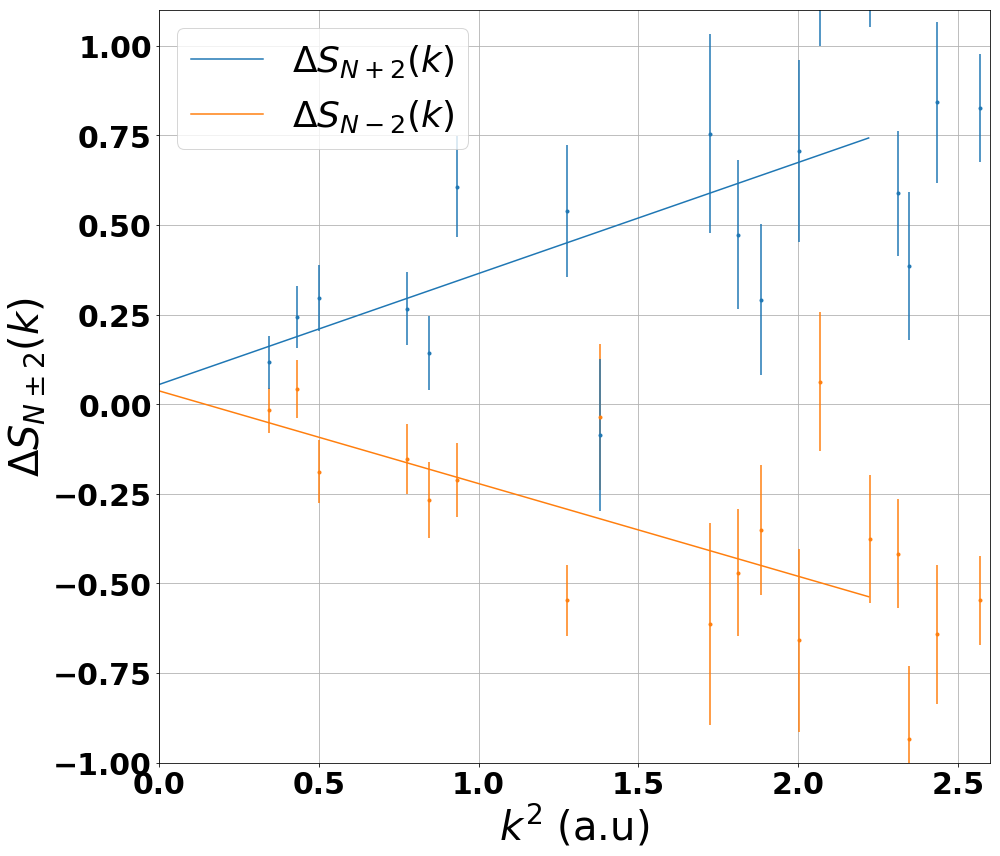

In [321]:
plt.figure(figsize=(14, 12))
#plt.tick_params(labelsize='large')
plt.ylabel("$\Delta S_{N \pm 2}(k)$", fontsize=40)
plt.xticks(fontsize=30,fontweight='bold')
plt.yticks(fontsize=30,fontweight='bold')
plt.grid()
plt.xlabel('$k^2$ (a.u)', fontsize=40)
plotGrid=numpy.arange(0,1.5,0.01)

plt.plot(plotGrid**2,line(plotGrid**2,*tmpP350m[0]),color='#1f77b4')
plt.plot(plotGrid**2,line(plotGrid**2,*tmpP350p[0]),color='#ff7f0e')
plt.legend(['$\Delta S_{N+2}(k)$','$\Delta S_{N-2}(k)$'],fontsize=36)

plt.errorbar(KgridP350[:60]**2,(numpy.average(ScordataCMCA12P350,axis=2)[2,:60]-numpy.average(ScordataCMCA12P350,axis=2)[3,:60]),
             yerr=numpy.sqrt((numpy.var(ScordataCMCA12P350,axis=2)[2,:60]+numpy.var(ScordataCMCA12P350,axis=2)[3,:60])/107.),fmt='.',color='#ff7f0e')

plt.errorbar(KgridP350[:60]**2,(numpy.average(ScordataCMCA12P350,axis=2)[4,:60]-numpy.average(ScordataCMCA12P350,axis=2)[3,:60]),
             yerr=numpy.sqrt((numpy.var(ScordataCMCA12P350,axis=2)[4,:60]+numpy.var(ScordataCMCA12P350,axis=2)[3,:60])/107.),fmt='.',color='#1f77b4')
plt.xlim(0,2.6)
plt.ylim(-1,1.1)

plt.tight_layout()

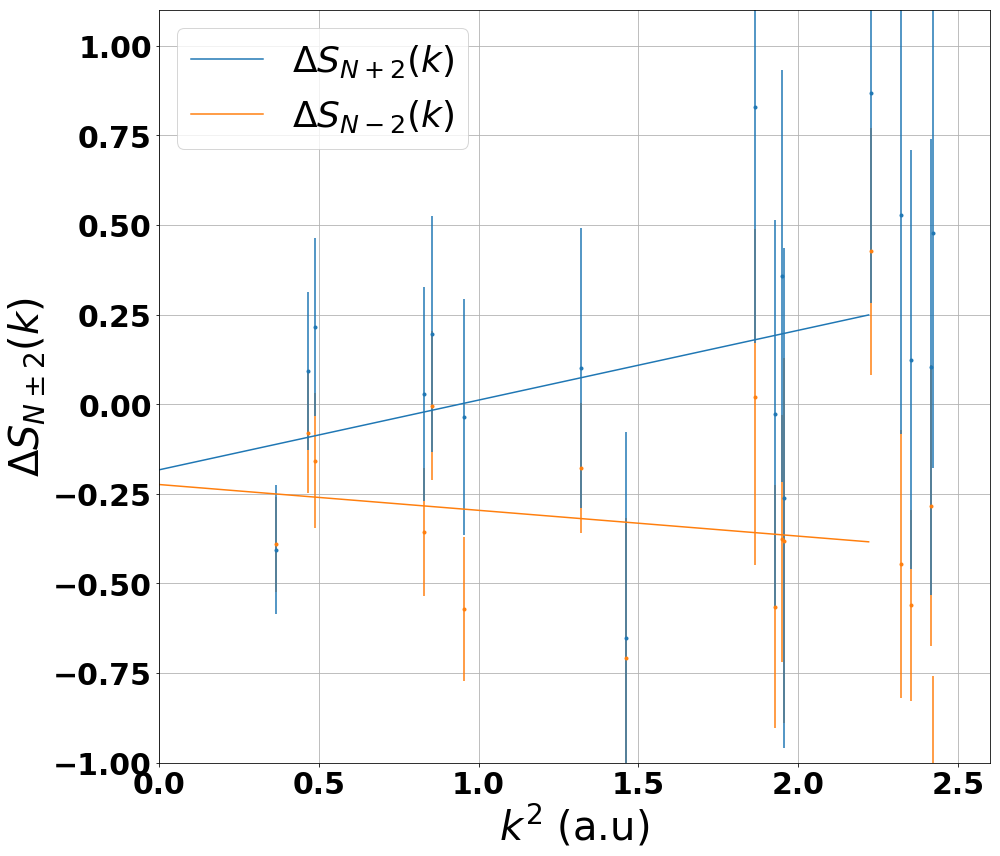

In [316]:
plt.figure(figsize=(14, 12))
#plt.tick_params(labelsize='large')
plt.ylabel("$\Delta S_{N \pm 2}(k)$", fontsize=40)
plt.xticks(fontsize=30,fontweight='bold')
plt.yticks(fontsize=30,fontweight='bold')
plt.grid()
plt.xlabel('$k^2$ (a.u)', fontsize=40)
plotGrid=numpy.arange(0,1.5,0.01)

plt.plot(plotGrid**2,line(plotGrid**2,*tmpP400m[0]),color='#1f77b4')
plt.plot(plotGrid**2,line(plotGrid**2,*tmpP400p[0]),color='#ff7f0e')
plt.legend(['$\Delta S_{N+2}(k)$','$\Delta S_{N-2}(k)$'],fontsize=36)

plt.errorbar(KgridP400[:60]**2,(numpy.average(ScordataCMCA12P400,axis=2)[2,:60]-numpy.average(ScordataCMCA12P400,axis=2)[3,:60]),
             yerr=numpy.sqrt((numpy.var(ScordataCMCA12P400,axis=2)[2,:60]+numpy.var(ScordataCMCA12P400,axis=2)[3,:60])/107.),fmt='.',color='#ff7f0e')

plt.errorbar(KgridP400[:60]**2,(numpy.average(ScordataCMCA12P400,axis=2)[4,:60]-numpy.average(ScordataCMCA12P400,axis=2)[3,:60]),
             yerr=numpy.sqrt((numpy.var(ScordataCMCA12P400,axis=2)[4,:60]+numpy.var(ScordataCMCA12P400,axis=2)[3,:60])/107.),fmt='.',color='#1f77b4')
plt.xlim(0,2.6)
plt.ylim(-1,1.1)

plt.tight_layout()

In [408]:
tmpP250p=getSizeCorrPlot((numpy.average(ScordataPc48P250,axis=2)[2,:200]-numpy.average(ScordataPc48P250,axis=2)[3,:200]),
                           KgridP250,cutoff=1.5,vmad=vmadPc48P250,
                           Sigma=numpy.sqrt((numpy.var(ScordataPc48P250,axis=2)[2,:200]+numpy.var(ScordataPc48P250,axis=2)[3,:200])/107.))
tmpP250m=getSizeCorrPlot((numpy.average(ScordataPc48P250,axis=2)[4,:200]-numpy.average(ScordataPc48P250,axis=2)[3,:200]),
                           KgridP250,cutoff=1.5,vmad=vmadPc48P250,
                           Sigma=numpy.sqrt((numpy.var(ScordataPc48P250,axis=2)[4,:200]+numpy.var(ScordataPc48P250,axis=2)[3,:200])/107.))

tmpP300p=getSizeCorrPlot((numpy.average(ScordataPc48P300,axis=2)[2,:200]-numpy.average(ScordataPc48P300,axis=2)[3,:200]),
                           KgridP300,cutoff=1.5,vmad=vmadPc48P300,
                           Sigma=numpy.sqrt((numpy.var(ScordataPc48P300,axis=2)[2,:200]+numpy.var(ScordataPc48P300,axis=2)[3,:200])/107.))
tmpP300m=getSizeCorrPlot((numpy.average(ScordataPc48P300,axis=2)[4,:200]-numpy.average(ScordataPc48P300,axis=2)[3,:200]),
                           KgridP300,cutoff=1.5,vmad=vmadPc48P300,
                           Sigma=numpy.sqrt((numpy.var(ScordataPc48P300,axis=2)[3,:200]+numpy.var(ScordataPc48P300,axis=2)[4,:200])/107.))

tmpP350p=getSizeCorrPlot((numpy.average(ScordataPc48P350,axis=2)[2,:200]-numpy.average(ScordataPc48P350,axis=2)[3,:200]),
                           KgridP350,cutoff=1.5,vmad=vmadPc48P350,
                           Sigma=numpy.sqrt((numpy.var(ScordataPc48P350,axis=2)[2,:200]+numpy.var(ScordataPc48P350,axis=2)[3,:200])/107.))
tmpP350m=getSizeCorrPlot((numpy.average(ScordataPc48P350,axis=2)[4,:200]-numpy.average(ScordataPc48P350,axis=2)[3,:200]),
                           KgridP350,cutoff=1.5,vmad=vmadPc48P350,
                           Sigma=numpy.sqrt((numpy.var(ScordataPc48P350,axis=2)[3,:200]+numpy.var(ScordataPc48P350,axis=2)[4,:200])/107.))


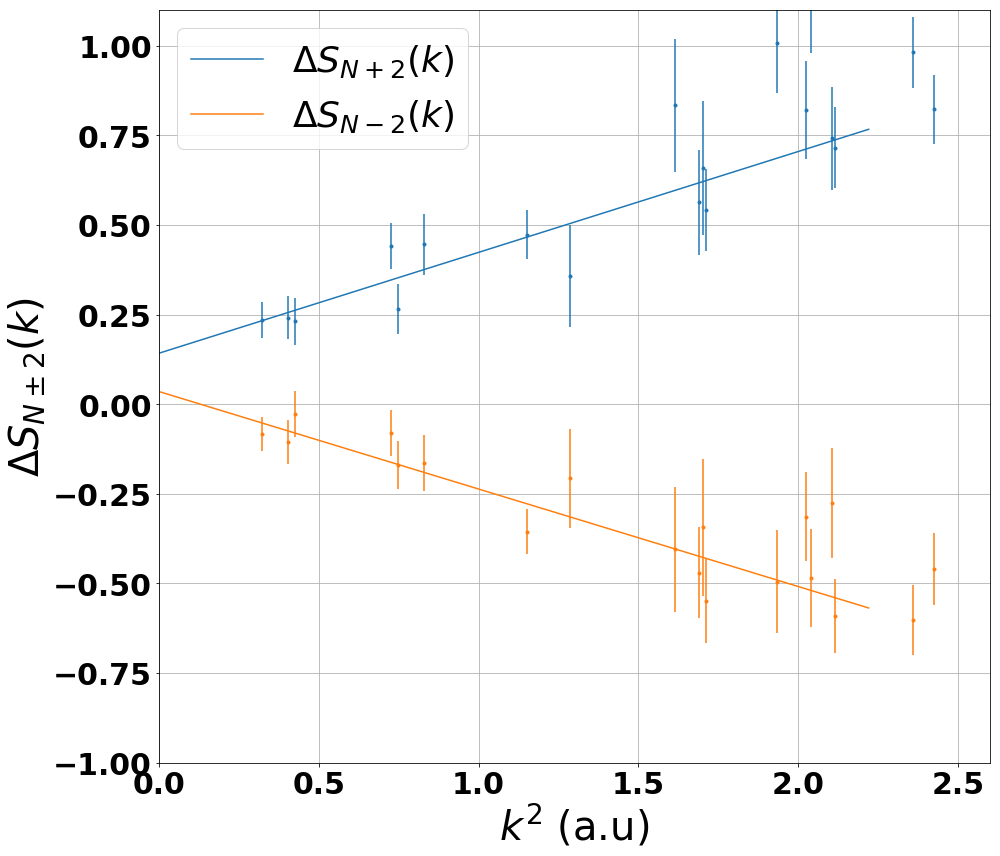

In [409]:
plt.figure(figsize=(14, 12))
#plt.tick_params(labelsize='large')
plt.ylabel("$\Delta S_{N \pm 2}(k)$", fontsize=40)
plt.xticks(fontsize=30,fontweight='bold')
plt.yticks(fontsize=30,fontweight='bold')
plt.grid()
plt.xlabel('$k^2$ (a.u)', fontsize=40)
plotGrid=numpy.arange(0,1.5,0.01)

#plt.plot(plotGrid,line(plotGrid,*linfit[0]),color='#ff7f0e')
plt.plot(plotGrid**2,line(plotGrid**2,*tmpP250m[0]),color='#1f77b4')
plt.plot(plotGrid**2,line(plotGrid**2,*tmpP250p[0]),color='#ff7f0e')
plt.legend(['$\Delta S_{N+2}(k)$','$\Delta S_{N-2}(k)$'],fontsize=36)

#plt.errorbar(KgridP3\Delta 00[:90],1-((numpy.average(ScordataPc48P250_L,axis=2)[4,:90]/96.)*2*wp/KgridP250_L[:90]**2)**2,
#             fmt='o',color='#ff7f0e')
plt.errorbar(KgridP250[:60]**2,(numpy.average(ScordataPc48P250,axis=2)[2,:60]-numpy.average(ScordataPc48P250,axis=2)[3,:60]),
             yerr=numpy.sqrt((numpy.var(ScordataPc48P250,axis=2)[2,:60]+numpy.var(ScordataPc48P250,axis=2)[3,:60])/107.),fmt='.',color='#ff7f0e')

plt.errorbar(KgridP250[:60]**2,(numpy.average(ScordataPc48P250,axis=2)[4,:60]-numpy.average(ScordataPc48P250,axis=2)[3,:60]),
             yerr=numpy.sqrt((numpy.var(ScordataPc48P250,axis=2)[4,:60]+numpy.var(ScordataPc48P250,axis=2)[3,:60])/107.),fmt='.',color='#1f77b4')
plt.xlim(0,2.6)
plt.ylim(-1,1.1)

plt.tight_layout()

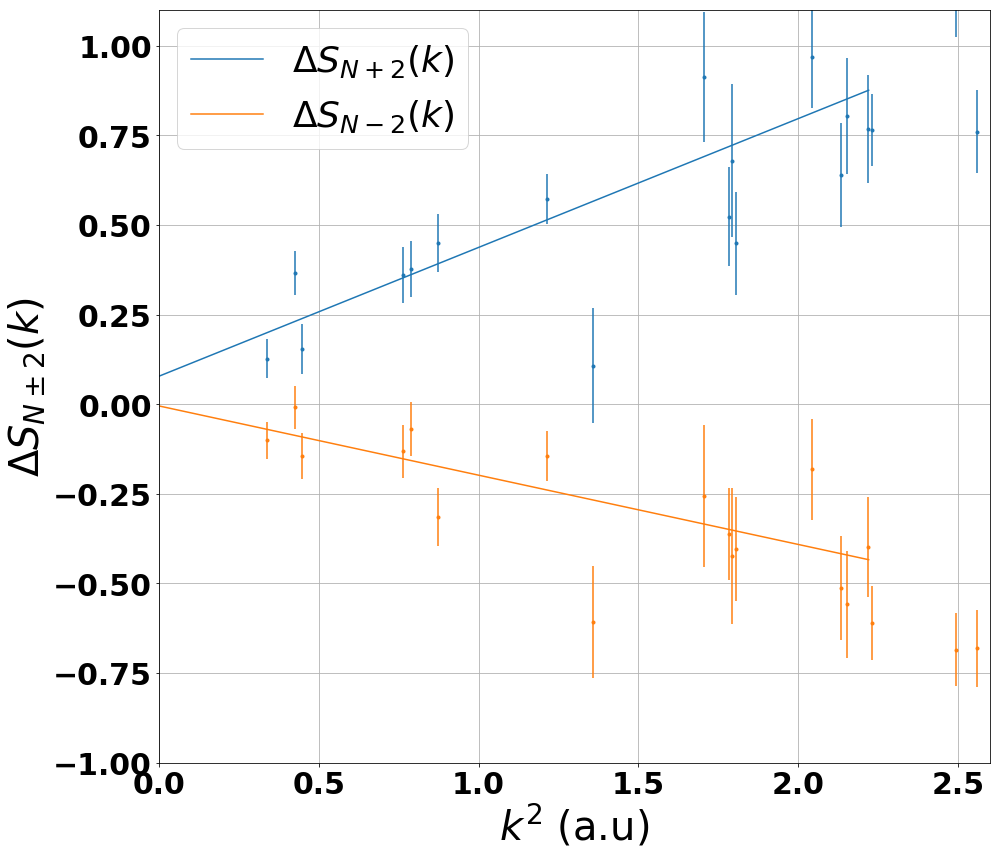

In [411]:
plt.figure(figsize=(14, 12))
#plt.tick_params(labelsize='large')
plt.ylabel("$\Delta S_{N \pm 2}(k)$", fontsize=40)
plt.xticks(fontsize=30,fontweight='bold')
plt.yticks(fontsize=30,fontweight='bold')
plt.grid()
plt.xlabel('$k^2$ (a.u)', fontsize=40)
plotGrid=numpy.arange(0,1.5,0.01)

#plt.plot(plotGrid,line(plotGrid,*linfit[0]),color='#ff7f0e')
plt.plot(plotGrid**2,line(plotGrid**2,*tmpP300m[0]),color='#1f77b4')
plt.plot(plotGrid**2,line(plotGrid**2,*tmpP300p[0]),color='#ff7f0e')
plt.legend(['$\Delta S_{N+2}(k)$','$\Delta S_{N-2}(k)$'],fontsize=36)

#plt.errorbar(KgridP3\Delta 00[:90],1-((numpy.average(ScordataPc48P300_L,axis=2)[4,:90]/96.)*2*wp/KgridP300_L[:90]**2)**2,
#             fmt='o',color='#ff7f0e')
plt.errorbar(KgridP300[:60]**2,(numpy.average(ScordataPc48P300,axis=2)[2,:60]-numpy.average(ScordataPc48P300,axis=2)[3,:60]),
             yerr=numpy.sqrt((numpy.var(ScordataPc48P300,axis=2)[2,:60]+numpy.var(ScordataPc48P300,axis=2)[3,:60])/107.),fmt='.',color='#ff7f0e')

plt.errorbar(KgridP300[:60]**2,(numpy.average(ScordataPc48P300,axis=2)[4,:60]-numpy.average(ScordataPc48P300,axis=2)[3,:60]),
             yerr=numpy.sqrt((numpy.var(ScordataPc48P300,axis=2)[4,:60]+numpy.var(ScordataPc48P300,axis=2)[3,:60])/107.),fmt='.',color='#1f77b4')
plt.xlim(0,2.6)
plt.ylim(-1,1.1)

plt.tight_layout()

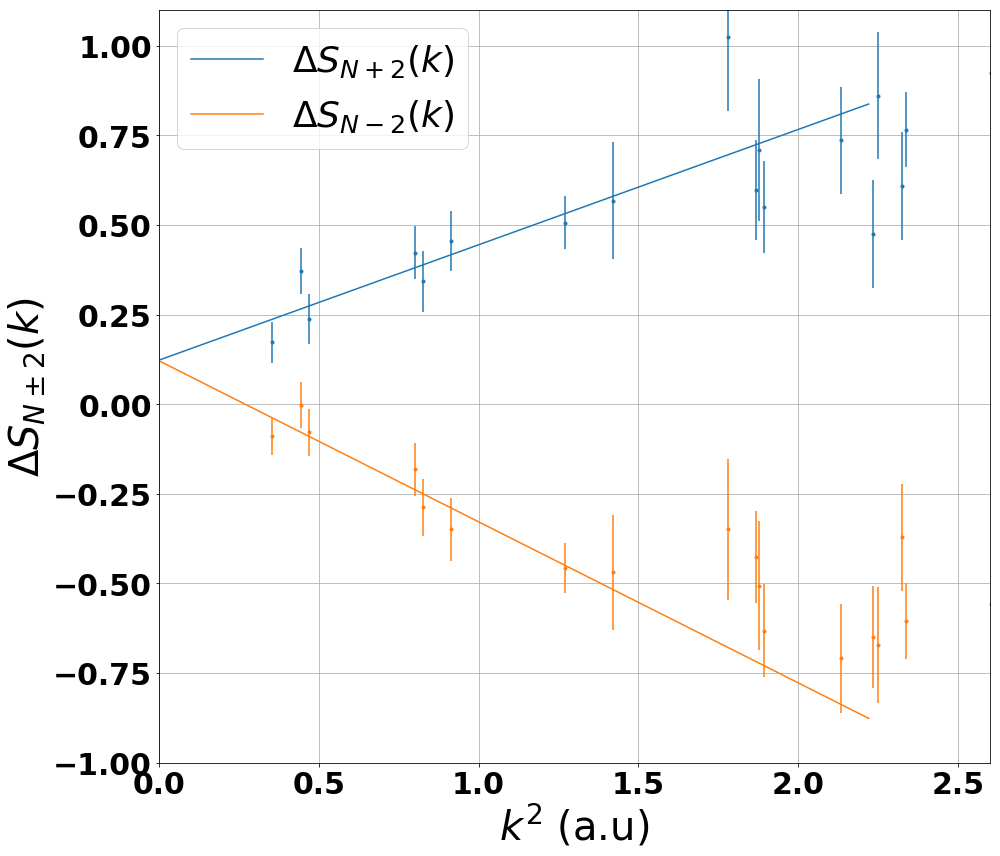

In [410]:
plt.figure(figsize=(14, 12))
#plt.tick_params(labelsize='large')
plt.ylabel("$\Delta S_{N \pm 2}(k)$", fontsize=40)
plt.xticks(fontsize=30,fontweight='bold')
plt.yticks(fontsize=30,fontweight='bold')
plt.grid()
plt.xlabel('$k^2$ (a.u)', fontsize=40)
plotGrid=numpy.arange(0,1.5,0.01)

#plt.plot(plotGrid,line(plotGrid,*linfit[0]),color='#ff7f0e')
plt.plot(plotGrid**2,line(plotGrid**2,*tmpP350m[0]),color='#1f77b4')
plt.plot(plotGrid**2,line(plotGrid**2,*tmpP350p[0]),color='#ff7f0e')
plt.legend(['$\Delta S_{N+2}(k)$','$\Delta S_{N-2}(k)$'],fontsize=36)

#plt.errorbar(KgridP3\Delta 00[:90],1-((numpy.average(ScordataPc48P350_L,axis=2)[4,:90]/96.)*2*wp/KgridP350_L[:90]**2)**2,
#             fmt='o',color='#ff7f0e')
plt.errorbar(KgridP350[:60]**2,(numpy.average(ScordataPc48P350,axis=2)[2,:60]-numpy.average(ScordataPc48P350,axis=2)[3,:60]),
             yerr=numpy.sqrt((numpy.var(ScordataPc48P350,axis=2)[2,:60]+numpy.var(ScordataPc48P350,axis=2)[3,:60])/107.),fmt='.',color='#ff7f0e')

plt.errorbar(KgridP350[:60]**2,(numpy.average(ScordataPc48P350,axis=2)[4,:60]-numpy.average(ScordataPc48P350,axis=2)[3,:60]),
             yerr=numpy.sqrt((numpy.var(ScordataPc48P350,axis=2)[4,:60]+numpy.var(ScordataPc48P350,axis=2)[3,:60])/107.),fmt='.',color='#1f77b4')
plt.xlim(0,2.6)
plt.ylim(-1,1.1)

plt.tight_layout()

# Gamma bound

In [131]:
1/(wp300)

0.8955638819574329

In [132]:
1/(wp250)

0.9359615376712869

In [17]:
wp250=numpy.sqrt(3/1.38**3)
wp300=numpy.sqrt(3/1.34**3)


In [77]:
print tmpP300_Lm[0][0]+tmpP300_Lp[0][0], numpy.sqrt(tmpP300_Lm[1][0,0]+tmpP300_Lp[1][0,0])
print linfitP300[0][0]

0.06287167835460089 0.05202701510448473
0.07405500455210978


In [54]:
print tmpP250m[0][0]+tmpP250p[0][0], numpy.sqrt(tmpP250m[1][0,0]+tmpP250p[1][0,0])
print linfitP250[0][0], numpy.sqrt(linfitP250[1][0,0])


0.10641997459769305 0.03614277753694965
0.12025247802309956 0.024970590911778875


In [101]:
linfitP250[0][0]/2

0.06012623901154978

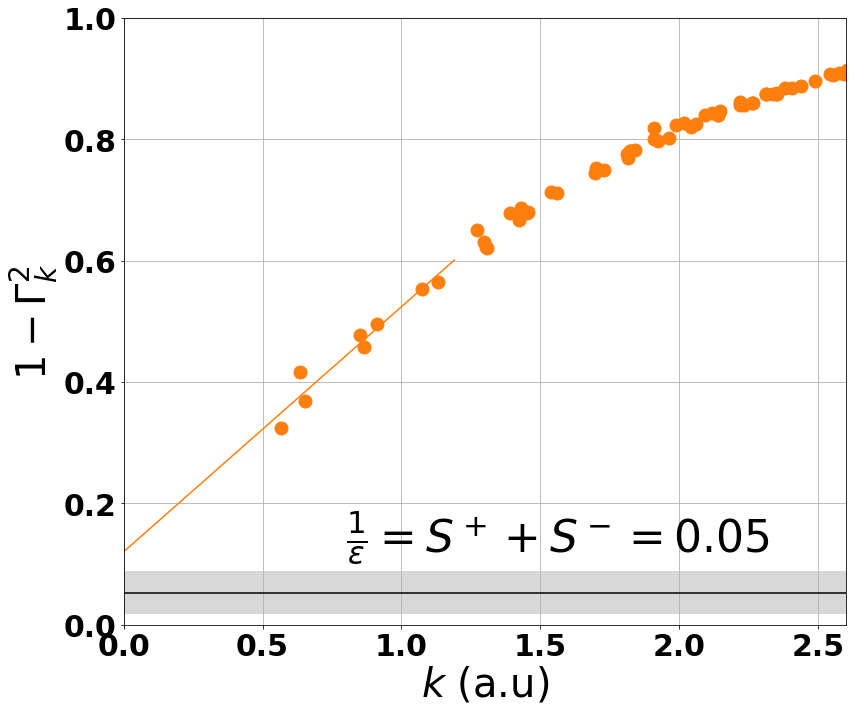

In [25]:
plt.figure(figsize=(12, 10))
#plt.tick_params(labelsize='large')
plt.ylabel("$1-\Gamma^2_k$", fontsize=40)
plt.xticks(fontsize=30,fontweight='bold')
plt.yticks(fontsize=30,fontweight='bold')
plt.grid()
plt.xlabel('$k$ (a.u)', fontsize=40)
plotGrid=numpy.arange(0,1.2,0.01)

linfitP250=curve_fit(line,KgridP250_8[:10],1-((numpy.average(ScordataC2CP250_8,axis=2)[4,:10]/96.)*2*wp250/KgridP250_8[:10]**2)**2)
plt.plot(plotGrid,line(plotGrid,*linfitP250[0]),color='#ff7f0e')
plt.errorbar(KgridP250_8[:90],1-((numpy.average(ScordataC2CP250_8,axis=2)[4,:90]/96.)*2*wp250/KgridP250_8[:90]**2)**2,
             fmt='o',color='#ff7f0e',markersize=13)
#plt.errorbar(KgridP250_8[:60]**2,(numpy.average(ScordataC2CP250_8,axis=2)[3,:60]-numpy.average(ScordataC2CP250_8,axis=2)[4,:60]),
#             yerr=numpy.sqrt((numpy.var(ScordataC2CP250_8,axis=2)[4,:60]+numpy.var(ScordataC2CP250_8,axis=2)[5,:60])/107.),fmt='.',color='#ff7f0e')

plt.errorbar(numpy.arange(0,4,1),numpy.full(numpy.arange(0,4,1).shape[0],tmpP250m[0][0]+tmpP250p[0][0])/2,fmt='-',color='black')
plt.fill_between(numpy.arange(0,4,1), numpy.full(numpy.arange(0,4,1).shape[0],tmpP250m[0][0]+tmpP250p[0][0])/2-numpy.sqrt(tmpP250m[1][0,0]+tmpP250p[1][0,0]), 
                                      numpy.full(numpy.arange(0,4,1).shape[0],tmpP250m[0][0]+tmpP250p[0][0])/2+numpy.sqrt(tmpP250m[1][0,0]+tmpP250p[1][0,0]),
    alpha=.3, facecolor='gray')
#    linewidth=4, linestyle='dashdot', antialiased=True)

plt.text(.8,0.12,"$\\frac{1}{\epsilon}=S^++S^-=%.02f$" % ((tmpP250m[0][0]+tmpP250p[0][0])/2),fontsize=44)

plt.xlim(0,2.6)
plt.ylim(0,1.)

plt.tight_layout()
plt.savefig('/local/home/vgorelov/Documents/Thesis/Gamma_C2cp250_8.pdf',dpi=300,format='pdf')


In [84]:
print linfitP250[0][0], (0.00154247+0.01318894)*2/vmadC2CP250
print linfitP300[0][0], (1.33024235e-03+7.60615982e-03)*2/vmadC2CP300

0.12025247802309956 0.10641996144
0.07405500455210978 0.062871679875


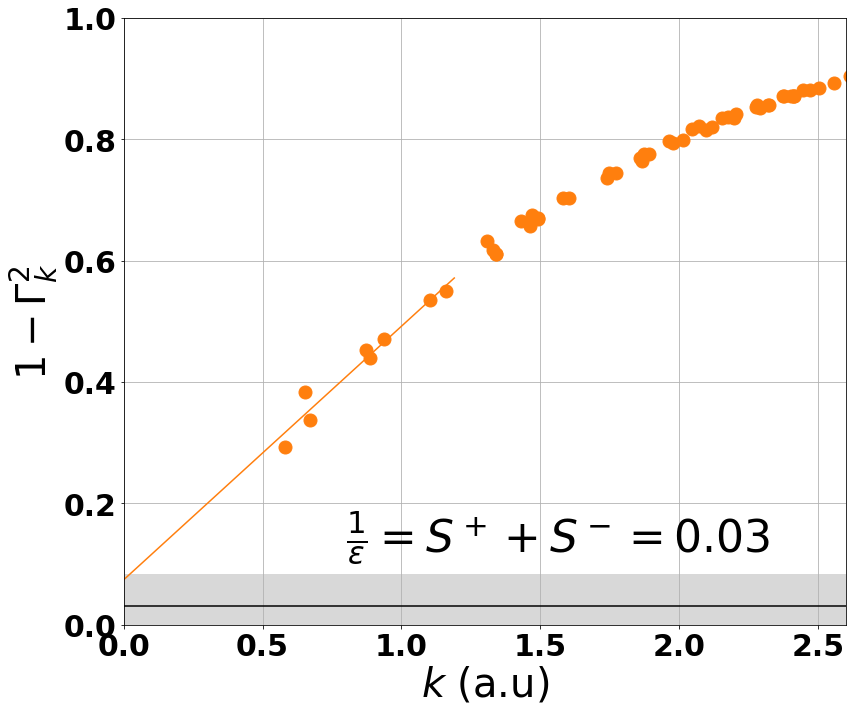

In [28]:
plt.figure(figsize=(12, 10))
#plt.tick_params(labelsize='large')
plt.ylabel("$1-\Gamma^2_k$", fontsize=40)
plt.xticks(fontsize=30,fontweight='bold')
plt.yticks(fontsize=30,fontweight='bold')
plt.grid()
plt.xlabel('$k$ (a.u)', fontsize=40)
plotGrid=numpy.arange(0,1.2,0.01)

linfitP300=curve_fit(line,KgridP300_L[:10],1-((numpy.average(ScordataC2CP300_L,axis=2)[4,:10]/96.)*2*wp300/KgridP300_L[:10]**2)**2)
plt.plot(plotGrid,line(plotGrid,*linfitP300[0]),color='#ff7f0e')

plt.errorbar(KgridP300_L[:90],1-((numpy.average(ScordataC2CP300_L,axis=2)[4,:90]/96.)*2*wp300/KgridP300_L[:90]**2)**2,
             fmt='o',color='#ff7f0e',markersize=13)

plt.errorbar(numpy.arange(0,4,1),numpy.full(numpy.arange(0,4,1).shape[0],tmpP300_Lm[0][0]+tmpP300_Lp[0][0])/2,fmt='-',color='black')
plt.fill_between(numpy.arange(0,4,1), numpy.full(numpy.arange(0,4,1).shape[0],tmpP300_Lm[0][0]+tmpP300_Lp[0][0])/2-numpy.sqrt(tmpP300_Lm[1][0,0]+tmpP300_Lp[1][0,0]), 
                                      numpy.full(numpy.arange(0,4,1).shape[0],tmpP300_Lm[0][0]+tmpP300_Lp[0][0])/2+numpy.sqrt(tmpP300_Lm[1][0,0]+tmpP300_Lp[1][0,0]),
    alpha=.3, facecolor='gray')


plt.text(.8,0.12,"$\\frac{1}{\epsilon}=S^++S^-=%.02f$" % ((tmpP300_Lm[0][0]+tmpP300_Lp[0][0])/2),fontsize=44)


plt.xlim(0,2.6)
plt.ylim(0,1.)

plt.tight_layout()
#plt.savefig('/local/home/vgorelov/Documents/Thesis/Gamma_C2cp300_L.pdf',dpi=300,format='pdf')


(0, 1.77)

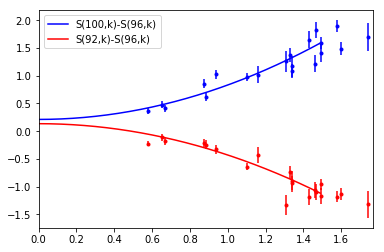

In [627]:
plt.plot(plotGrid,Quad(plotGrid,*fit_D4Splus[0]),color='b')
plt.plot(plotGrid,Quad(plotGrid,*fit_D4Sminus[0]),color='r')
plt.errorbar(Kgrid[:20],Delta4Splus[0,:20],yerr=Delta4Splus[1,:20],fmt='.',color='b')
plt.errorbar(Kgrid[:20],Delta4Sminus[0,:20],yerr=Delta4Sminus[1,:20],fmt='.',color='r')
plt.legend(['S(100,k)-S(96,k)','S(92,k)-S(96,k)'])
plt.xlim(0,1.77)
#plt.plot(ScordataC2C[3,:,0])

In [267]:
fit_D6Splus=curve_fit(Quad,Kgrid[:17],Delta6Splus[0,:17],sigma=Delta6Splus[1,:17])
fit_D6Sminus=curve_fit(Quad,Kgrid[:17],Delta6Sminus[0,:17],sigma=Delta6Sminus[1,:17])
print fit_D6Splus
print fit_D6Sminus

(array([0.37130403, 0.87080325]), array([[ 0.00596725, -0.00441858],
       [-0.00441858,  0.00474348]]))
(array([ 0.10411103, -0.79443333]), array([[ 0.00160061, -0.0011779 ],
       [-0.0011779 ,  0.0012586 ]]))


In [16]:
plt.figure(figsize=(10,8))
plt.plot(plotGrid,Quad(plotGrid,*fit_D6Splus[0]),color='b')
plt.plot(plotGrid,Quad(plotGrid,*fit_D6Sminus[0]),color='r')
plt.errobar(Kgrid[:20]**2,Delta6Splus[0,:20],yerr=Delta6Splus[1,:20],fmt='.',color='b')
plt.errorbar(Kgrid[:20]**2,Delta6Sminus[0,:20],yerr=Delta6Sminus[1,:20],fmt='.',color='r')
plt.legend(['S(102,k)-S(96,k)','S(90,k)-S(96,k)'])
plt.xlim(0,1.77)
#plt.plot(ScordataC2C[3,:,0])

NameError: name 'plotGrid' is not defined

In [425]:
"Corrected E(N)"
dataC2Ccorr=numpy.zeros((7,108))
dataC2Ccorr[0]=dataC2C[1][0]+fit_D6Sminus[0][0]*vmad/2.
dataC2Ccorr[1]=dataC2C[1][1]+fit_D4Sminus[0][0]*vmad/2.
dataC2Ccorr[2]=dataC2C[1][2]+fit_DSminus[0][0]*vmad/2.
dataC2Ccorr[3]=dataC2C[1][3]
dataC2Ccorr[4]=dataC2C[1][4]+fit_DSplus[0][0]*vmad/2.
dataC2Ccorr[5]=dataC2C[1][5]+fit_D4Splus[0][0]*vmad/2.
dataC2Ccorr[6]=dataC2C[1][6]+fit_D6Splus[0][0]*vmad/2.
"Corrected SizeEff BP  S(k) GC QMC C2CP300"
numpy.set_printoptions(threshold=numpy.nan)
GC_data_SkBP_SE=GC_QMC_S(dataC2Ccorr,ScordataC2C,nkdata_regul,VdataC2C[1],0.2,0.6,0.008,108)

(477, 50, 108)


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: Mean of empty slice


In [430]:
"the gap from the plateau"
print GC_data_SkBP[7]
print GC_data_SkBP_SE[7]
print (GC_data_SkBP_SE[7]-GC_data_SkBP[7])

2.6122944
3.0476768
0.4353824


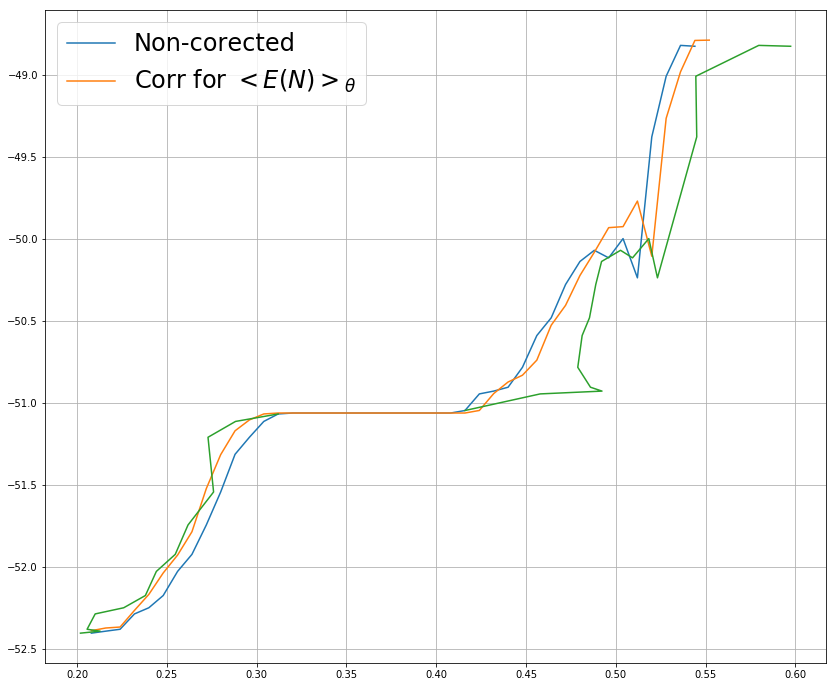

In [543]:
plt.figure(figsize=(14, 12))
plt.grid()
plt.plot(GC_data_SkBP[6],GC_data_SkBP[1])
plt.plot(GC_data_SkBP_SE[6],GC_data_SkBP_SE[1])
plt.plot(muCorr,GC_data_SkBP[1])
plt.legend(['Non-corected','Corr for $<E(N)>_{\\theta}$'],fontsize=24)

In [507]:
(0.52872554-0.24806791)*eV

7.637087032982001

In [18]:
"load twists"
vec_theta=numpy.loadtxt('C2CP300/RMC/theta')*2*numpy.pi

In [511]:
"\mu correction"
muCorr=numpy.full(GC_data_SkBP[6].shape[0],numpy.nan)
for i,mu in enumerate(numpy.where(GC_data_SkBP[1]<0)[0]):
    muCorr[mu]=GC_data_SkBP[6][mu]+getSizeCorr(Kgrid=Kgrid,SofK=(GC_data_SkBP[4][:200,mu]-GC_data_SkBP[4][:200,15]),cutoff=1.5)[0]*vmad/(GC_data_SkBP[0][mu]-GC_data_SkBP[0][15])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


In [465]:
"E(\mu) correction"
EmuCorr=numpy.full(GC_data_SkBP[6].shape[0],numpy.nan)
for i,mu in enumerate(numpy.where(GC_data_SkBP[1]<0)[0]):
    EmuCorr[mu]=GC_data_SkBP[1][mu]+getSizeCorr(Kgrid=Kgrid,SofK=(GC_data_SkBP[4][:200,mu]-GC_data_SkBP[4][:200,15]),cutoff=1.5)[0]*vmad

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until


[-0.00449761  0.00691652]
[-0.0034905  -0.00293539]


(0, 2)

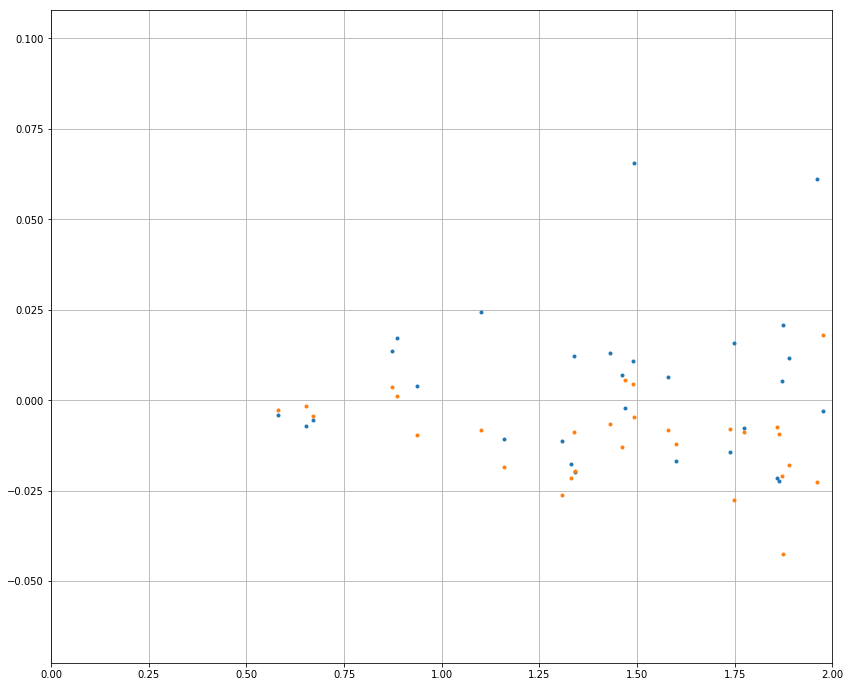

In [526]:
"fit GC_S(k)"
lines_colour_cycle = [p['color'] for p in plt.rcParams['axes.prop_cycle']]
plt.figure(figsize=(14, 12))
plt.grid()
for i in range(1):
    plt.plot(Kgrid[:200],GC_data_SkBP[4][:200,27+i]-GC_data_SkBP[4][:200,15],'.')
    plt.plot(Kgrid[:200],GC_data_SkBP[4][:200,14-i]-GC_data_SkBP[4][:200,15],'.')

    print getSizeCorr(Kgrid=Kgrid,SofK=(GC_data_SkBP[4][:200,27+i]-GC_data_SkBP[4][:200,15]),cutoff=1.5)
    print getSizeCorr(Kgrid=Kgrid,SofK=(GC_data_SkBP[4][:200,14-i]-GC_data_SkBP[4][:200,15]),cutoff=1.5)
#plt.plot(Kgrid[:200],GC_data_SkBP[4][:200,27]-GC_data_SkBP[4][:200,15],'.')
plt.xlim(0,2)
#plt.plot(GC_data_SkBP[4][:,27])

In [388]:
"BP  S(k) GC QMC C2CP300"
numpy.set_printoptions(threshold=numpy.nan)
GC_data_SkBP=GC_QMC_S(dataC2C[1],ScordataC2C,nkdata_regul,VdataC2C[1],0.2,0.6,0.008,108)

(477, 50, 108)


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: Mean of empty slice


# n(k)

In [5]:
"load data for C2C n(k,\theta)"
M=108
nkdataC2C = numpy.stack((numpy.loadtxt(('C2CP300/RMC/rmc%d.nk3d' % k), usecols=(range(3,M*5,5)), skiprows=1)[0:121]
                              for k in range(-6,7,2))
                            )
VnkdataC2C = numpy.stack((numpy.loadtxt(('C2CP300/RMC/rmc%d.nk3d' % k), usecols=(range(4,M*5,5)), skiprows=1)[0:121]
                              for k in range(-6,7,2))
                            )
Kvect = numpy.stack((numpy.loadtxt('C2CP300/RMC/rmc0.nk3d', usecols=(numpy.sort(numpy.concatenate((range(0,M*5,5),
                                                                                                          range(1,M*5,5),
                                                                                                          range(2,M*5,5))
                                                                                                        ))), 
                                   skiprows=1)[0:121])
                            ).reshape(121,108,3)

In [6]:
"create the same grid for n(k)_theta"
M=108
Kmod=(Kvect[:,:,0]**2+Kvect[:,:,1]**2+Kvect[:,:,2]**2)**0.5
KNeven=numpy.linspace(numpy.min(Kmod[:,:]),numpy.max(Kmod[:,:]),121)
Kmodeven=numpy.zeros((121,M))
nkdata_regul=numpy.zeros((7,121,M))
for i in range(M):
    Kmodeven[:,i]=KNeven[numpy.digitize(Kmod[:,i],KNeven)-1]
for n in range(7):
    for i in range(M):
        for k in range(121):
            nkdata_regul[n,k,i]=numpy.average(nkdataC2C[n,numpy.where(Kmodeven[:,i]==KNeven[k])[0],i])

/usr/local/lib/python2.7/dist-packages/numpy/lib/function_base.py:1128: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python2.7/dist-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [3]:
"unitary cell data & Broilloin zone"
#a1=numpy.asarray([5.41004,0.0,0.0])
a1=numpy.asarray([5.41888874242075,0.0,0.0])
a2=numpy.asarray([0.0,9.61340921910764,0.0])
a3=numpy.asarray([-2.69616,0.0,4.69033])
UCell=numpy.asarray([a1,a2,a3])
V=numpy.dot(a1,numpy.cross(a2,a3))

BZvec=numpy.stack((2*numpy.pi*numpy.cross(a2,a3)/V,2*numpy.pi*numpy.cross(a3,a1)/V,2*numpy.pi*numpy.cross(a1,a2)/V))

In [4]:
"Pickard cell"
alpha=numpy.pi*142.47/180.
pa1=numpy.asarray([4.9390,0,0])
pa2=numpy.asarray([0,2.8110,0])
pa3=numpy.asarray([4.1390*numpy.cos(alpha),0,4.1390*numpy.sin(alpha)])
PCell=numpy.asarray([pa1,pa2,pa3])*1.88973
print(PCell)

print(numpy.linalg.solve(UCell,PCell)) 
print(numpy.linalg.det(numpy.linalg.solve(UCell,PCell)))

[[ 9.33337647  0.          0.        ]
 [ 0.          5.31203103  0.        ]
 [-6.20279255  0.          4.76473224]]
[[ 1.72237832  0.          0.        ]
 [ 0.          0.55256475  0.        ]
 [-0.3323828   0.          1.0158629 ]]
0.9668226654574494


In [5]:
"supercell"
Cell=numpy.asarray([[10.83778, 0.000000000, 0.000000000],
                    [0.000000000, 9.61340921910764, 0.000000000],
                    [0.000000000,0.000000000,9.36534]])
#numpy.linalg.solve(BZvec,kS)
print(numpy.linalg.solve(UCell,Cell)) #tiling matrix
print(numpy.linalg.det(numpy.linalg.solve(UCell,Cell)))

[[2.00000046 0.         0.        ]
 [0.         1.         0.        ]
 [1.14966777 0.         1.99673371]]
3.99346833738569


In [ ]:
M=108
KvecBZ=numpy.zeros((121,M,3))
KvecBZprim=numpy.zeros((121,M,3))
for theta in range(M):
    for k in range(121):
        tm=numpy.linalg.solve(numpy.transpose(BZvec),Kvect[k,theta])
        KvecBZ[k,theta]=numpy.sum((tm-numpy.round(tm))*BZvec,axis=0)
        KvecBZprim[k,theta]=tm-numpy.round(tm)


In [16]:
BZvec

array([[ 1.15949701, -0.        ,  0.66651802],
       [ 0.        ,  0.65358555, -0.        ],
       [ 0.        ,  0.        ,  1.3396041 ]])

In [24]:
"folding K vect back in the BZ"
def KvectBZ(Kvect,BZvec):
    M=108
    KvecBZ=numpy.zeros((M,3))
    KvecBZprim=numpy.zeros((M,3))
    for theta in range(M):
            tm=numpy.linalg.solve(numpy.transpose(BZvec),Kvect[theta])
            KvecBZ[theta]=numpy.sum((tm-numpy.round(tm))*BZvec,axis=0)
            KvecBZprim[theta]=tm-numpy.round(tm)
    return KvecBZprim,KvecBZ

In [26]:
twistsP300=numpy.loadtxt('C2CP300/RMC//twistgrid.out',skiprows=108)
tmp=KvectBZ(twistsP300,BZvec)

In [40]:
twistsP300

array([[ 0.0077,  0.0087,  0.0089],
       [ 0.0077,  0.0087,  0.0267],
       [ 0.0077,  0.0087,  0.0445],
       [ 0.0077,  0.0087, -0.0445],
       [ 0.0077,  0.0087, -0.0267],
       [ 0.0077,  0.0087, -0.0089],
       [ 0.0077,  0.026 ,  0.0089],
       [ 0.0077,  0.026 ,  0.0267],
       [ 0.0077,  0.026 ,  0.0445],
       [ 0.0077,  0.026 , -0.0445],
       [ 0.0077,  0.026 , -0.0267],
       [ 0.0077,  0.026 , -0.0089],
       [ 0.0077,  0.0433,  0.0089],
       [ 0.0077,  0.0433,  0.0267],
       [ 0.0077,  0.0433,  0.0445],
       [ 0.0077,  0.0433, -0.0445],
       [ 0.0077,  0.0433, -0.0267],
       [ 0.0077,  0.0433, -0.0089],
       [ 0.0077, -0.0433,  0.0089],
       [ 0.0077, -0.0433,  0.0267],
       [ 0.0077, -0.0433,  0.0445],
       [ 0.0077, -0.0433, -0.0445],
       [ 0.0077, -0.0433, -0.0267],
       [ 0.0077, -0.0433, -0.0089],
       [ 0.0077, -0.026 ,  0.0089],
       [ 0.0077, -0.026 ,  0.0267],
       [ 0.0077, -0.026 ,  0.0445],
       [ 0.0077, -0.026 , -0

In [45]:
twistsP300[3]

array([ 0.0077,  0.0087, -0.0445])

In [44]:
twistsP300[32:36]

array([[ 0.0077, -0.0087,  0.0445],
       [ 0.0077, -0.0087, -0.0445],
       [ 0.0077, -0.0087, -0.0267],
       [ 0.0077, -0.0087, -0.0089]])

In [46]:
tmp[0][32]

array([ 0.00664081, -0.01331119,  0.02991464])

In [16]:
"create the same grid for n(k) incide BZ"
M=108
KmodBZ=(KvecBZ[:,:,0]**2+KvecBZ[:,:,1]**2+KvecBZ[:,:,2]**2)**0.5
KNevenBZ=numpy.linspace(numpy.min(KmodBZ[:,:]),numpy.max(KmodBZ[:,:]),121)
KmodBZeven=numpy.zeros((121,M))
nkdata_regulBZ=numpy.zeros((7,121,M))
for i in range(M):
    KmodBZeven[:,i]=KNevenBZ[numpy.digitize(KmodBZ[:,i],KNevenBZ)-1]
for n in range(7):
    for i in range(M):
        for k in range(121):
            nkdata_regulBZ[n,k,i]=numpy.average(nkdataC2C[n,numpy.where(KmodBZeven[:,i]==KNevenBZ[k])[0],i])

# n(k) continuation

In [20]:
"check k-directions of excitations from N-2 N+2"
for i in range(M):
    if(abs(sum(KvecBZ[numpy.argmax(nkdataC2C[4,:,i]-nkdataC2C[3,:,i]),i]-KvecBZ[numpy.argmax(nkdataC2C[3,:,i]-nkdataC2C[2,:,i]),i])) < 0.01):
        print(i, KvecBZ[numpy.argmax(nkdataC2C[4,:,i]-nkdataC2C[3,:,i]),i]-KvecBZ[numpy.argmax(nkdataC2C[3,:,i]-nkdataC2C[2,:,i]),i])
        print(KvecBZ[numpy.argmax(nkdataC2C[4,:,i]-nkdataC2C[3,:,i]),i],numpy.linalg.solve(BZvec,KvecBZ[numpy.argmax(nkdataC2C[4,:,i]-nkdataC2C[3,:,i]),i]))
        print(Kvect[numpy.argmax(nkdataC2C[4,:,i]-nkdataC2C[3,:,i]),i],Kvect[numpy.argmax(nkdataC2C[3,:,i]-nkdataC2C[2,:,i]),i])

(1, array([-3.92365811e-07,  3.63938640e-07,  3.27784526e-03]))
(array([ 0.04831199,  0.05446545, -0.7885566 ]), array([ 0.38004164,  0.08333332, -0.58864899]))
(array([1.207809 , 0.708051 , 0.1677244]), array([ 0.04831238, -1.252706  ,  0.8386219 ]))
(4, array([-3.92365811e-07,  3.63938640e-07,  6.55882146e-03]))
(array([0.04831199, 0.05446545, 0.71521467]), array([-0.26523743,  0.08333332,  0.53390003]))
(array([ 1.207809 ,  0.708051 , -0.1677244]), array([ 0.04831238, -1.252706  , -0.8386219 ]))
(12, array([ 3.92365811e-07,  0.00000000e+00, -3.27799501e-03]))
(array([0.04831238, 0.2723273 , 0.04541662]), array([0.02217807, 0.41666665, 0.03390302]))
(array([0.04831238, 0.2723273 , 1.397703  ]), array([1.207809 , 0.2723273, 0.7268056]))
(17, array([ 3.92365811e-07,  0.00000000e+00, -6.55867171e-03]))
(array([ 0.04831238,  0.2723273 , -0.12859522]), array([ 0.0968478 ,  0.41666665, -0.09599494]))
(array([ 0.04831238,  0.2723273 , -1.397703  ]), array([ 1.207809 ,  0.2723273, -0.7268056

In [21]:
"check k-directions of excitations from N-2 N+2 and that k vectors adds up to zero"
for i in range(M):
    k_ex=KvecBZ[numpy.argmax(nkdataC2C[4,:,i]-nkdataC2C[3,:,i]),i]
    k_hex=KvecBZ[numpy.argmax(nkdataC2C[3,:,i]-nkdataC2C[2,:,i]),i]
    if(abs(k_ex-k_hex)[0] < 0.01 and abs(k_ex-k_hex)[1] < 0.01 and abs(k_ex-k_hex)[2] < 0.01):
        print(i,k_ex, k_hex, k_ex-k_hex)

(1, array([ 0.04831199,  0.05446545, -0.7885566 ]), array([ 0.04831238,  0.05446509, -0.79183445]), array([-3.92365811e-07,  3.63938640e-07,  3.27784526e-03]))
(4, array([0.04831199, 0.05446545, 0.71521467]), array([0.04831238, 0.05446509, 0.70865585]), array([-3.92365811e-07,  3.63938640e-07,  6.55882146e-03]))
(12, array([0.04831238, 0.2723273 , 0.04541662]), array([0.04831199, 0.2723273 , 0.04869461]), array([ 3.92365811e-07,  0.00000000e+00, -3.27799501e-03]))
(17, array([ 0.04831238,  0.2723273 , -0.12859522]), array([ 0.04831199,  0.2723273 , -0.12203654]), array([ 3.92365811e-07,  0.00000000e+00, -6.55867171e-03]))
(18, array([ 0.04831238, -0.2723273 ,  0.04541662]), array([ 0.04831238, -0.2723273 ,  0.04541662]), array([0., 0., 0.]))
(23, array([ 0.04831238, -0.2723273 , -0.12859522]), array([ 0.04831201, -0.27232735, -0.13187256]), array([3.67634189e-07, 4.53537867e-08, 3.27734077e-03]))
(31, array([ 0.04831199, -0.05446545, -0.7885566 ]), array([ 0.04831238, -0.05446509, -0.7

In [22]:
vec_theta[[1,4,12,17,18,23,31,34,37,40,67,70,79,82,96,98,99,101,103,104,105,106]]/2/numpy.pi

array([[ 0.0077,  0.0087,  0.0267],
       [ 0.0077,  0.0087, -0.0267],
       [ 0.0077,  0.0433,  0.0089],
       [ 0.0077,  0.0433, -0.0089],
       [ 0.0077, -0.0433,  0.0089],
       [ 0.0077, -0.0433, -0.0089],
       [ 0.0077, -0.0087,  0.0267],
       [ 0.0077, -0.0087, -0.0267],
       [ 0.0231,  0.0087,  0.0267],
       [ 0.0231,  0.0087, -0.0267],
       [ 0.0231, -0.0087,  0.0267],
       [ 0.0231, -0.0087, -0.0267],
       [ 0.0384,  0.026 ,  0.0267],
       [ 0.0384,  0.026 , -0.0267],
       [ 0.0384, -0.026 ,  0.0089],
       [ 0.0384, -0.026 ,  0.0445],
       [ 0.0384, -0.026 , -0.0445],
       [ 0.0384, -0.026 , -0.0089],
       [ 0.0384, -0.0087,  0.0267],
       [ 0.0384, -0.0087,  0.0445],
       [ 0.0384, -0.0087, -0.0445],
       [ 0.0384, -0.0087, -0.0267]])

In [24]:
"check k-directions of excitations for \mu resolved"
excit=GC_data_SkBP[5][:,27]-GC_data_SkBP[5][:,20]
holeexit=GC_data_SkBP[5][:,20]-GC_data_SkBP[5][:,14]
excit[numpy.isnan(excit)]=-1000
holeexit[numpy.isnan(holeexit)]=-1000

print(KNeven[numpy.argsort(excit)[-1]])
print(KNeven[numpy.argsort(holeexit)[-1]])


0.17048687303573315
0.5482086644523075


In [25]:
"check k-directions of excitations for \mu resolved"
possibleKP=[]
possibleKM=[]

for i in range(M):
    for k in range(121):
        if(abs(Kmod[k,i]-0.17048687303573315) < 0.015608338488288196/2):
#            print("+",k,i,KvecBZ[k,i])
            possibleKP.append(KvecBZ[k,i])
        if(abs(Kmod[k,i]-0.5482086644523075) < 0.015608338488288196/2):
#            print(k,i,KvecBZ[k,i])
            possibleKM.append(KvecBZ[k,i])
print("\n")
for i in range(len(possibleKP)):
    for j in range(len(possibleKM)):
        if(sum(abs(possibleKP[i]+possibleKM[j])) < 0.1):
            print(i,j,possibleKP[i],possibleKM[j])

In [26]:
VnkdataC2C.shape

(7, 121, 108)

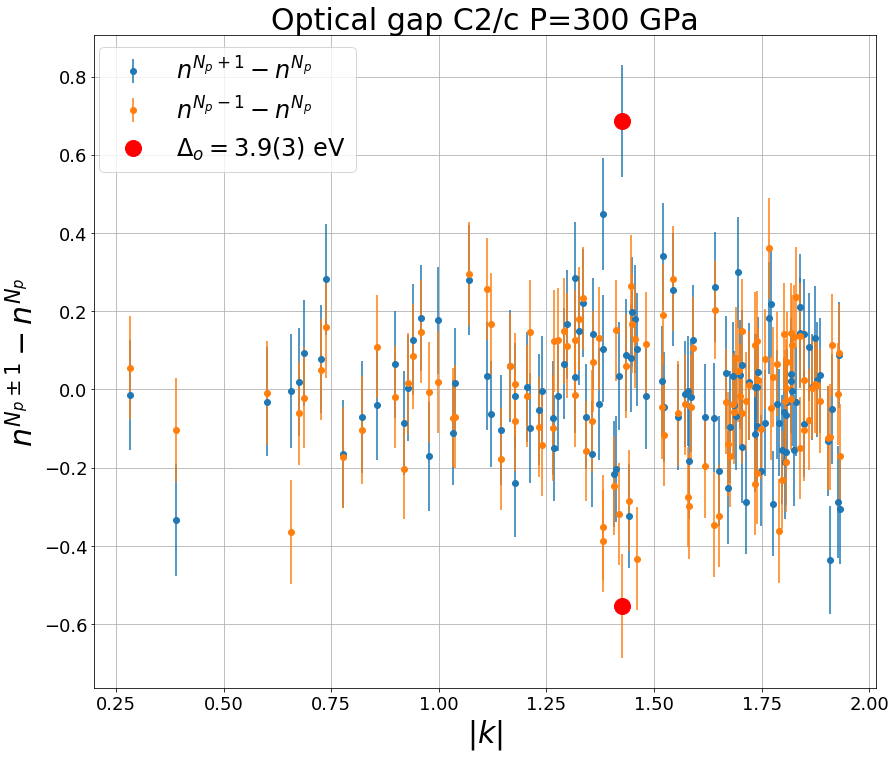

In [27]:
plt.figure(figsize=(14, 12))
plt.tick_params(labelsize=18)
plt.title('Optical gap C2/c P=300 GPa', fontsize=30)
plt.xlabel("$|k|$", fontsize=30)
#plt.xlim(0,2.5)
#plt.ylim(-.02,.02)
plt.grid()
plt.ylabel('$n^{N_p\pm1}-n^{N_p}$', fontsize=30)
#cmap = plt.get_cmap('jet_r')
#for i in range(4,20,4):
#    color = cmap(float(i)/43)

##################################################  
"check that the grid is the same"                #
#plt.plot(Kmodeven[:,100],nkdataC2C[3,:,100],'o')#
#plt.plot(Kmod[:,100],nkdataC2C[3,:,100],'o')    # 
#plt.plot(KNeven,nkdata_regul[3,:,100],'^')      #   
##################################################

#plt.plot(KNevenBZ,GC_data_SkBP[5][:,20],'o')
plt.errorbar(Kmod[:,18],nkdataC2C[4,:,18]-nkdataC2C[3,:,18],
             yerr=numpy.sqrt(VnkdataC2C[4,:,18]**2+VnkdataC2C[3,:,18]**2),fmt='o')
plt.errorbar(Kmod[:,18],nkdataC2C[2,:,18]-nkdataC2C[3,:,18],
             yerr=numpy.sqrt(VnkdataC2C[2,:,18]**2+VnkdataC2C[3,:,18]**2),fmt='o')

max_el=numpy.argmax(nkdataC2C[4,:,18]-nkdataC2C[3,:,18])
min_hole=numpy.argmin(nkdataC2C[2,:,18]-nkdataC2C[3,:,18])
plt.errorbar(Kmod[max_el,18],(nkdataC2C[4,:,18]-nkdataC2C[3,:,18])[max_el],fmt='ro',ms=16)
plt.errorbar(Kmod[min_hole,18],(nkdataC2C[2,:,18]-nkdataC2C[3,:,18])[min_hole],fmt='ro',ms=16)

#plt.plot(numpy.arange(0,2,0.01),linSkBP(numpy.arange(0,2,0.01),optdS[i-1]),'-')
#    plt.plot(K,GC_data_SkBP[4][:,i+27]-GC_data_SkBP[4][:,20],'.')

plt.legend(['$n^{N_p+1}-n^{N_p}$','$n^{N_p-1}-n^{N_p}$','$\Delta_o=3.9(3)$ eV'],bbox_to_anchor=(0.35, 1),fontsize=24)

#plt.savefig('/local/home/vgorelov/Documents/Thesis/BG_optic_n(k).pdf',format='pdf')

In [28]:
"Save S(k,mu)"
numpy.savetxt('GC_C2CP300_S(k).out', numpy.transpose(numpy.append([K],numpy.transpose(GC_data_Sk[4]),axis=0)))

NameError: name 'K' is not defined

In [29]:
"Save n(k,mu)"
numpy.savetxt('GC_C2CP300_n(k)_BZ.out', numpy.transpose(numpy.append([KNevenBZ],numpy.transpose(GC_data_SkBP[5]),axis=0)))

In [30]:
def linSk(x,b):
    return b*x

optdS=numpy.zeros(43)

ind=numpy.where((GC_data_Sk[4][:,5]>0.) & (K<1.9))[0]
for i in range(1,44):
    optdS[i-1]=curve_fit(linSk,K[ind],GC_data_Sk[4][ind,i]-GC_data_Sk[4][ind,20])[0][0]


NameError: name 'GC_data_Sk' is not defined

In [31]:
"G_correction load data for C2C: <rho(k)>, S(k) ..."
GdataC2C = numpy.loadtxt('C2CP300/RMC/rmc0.rhok2twist',skiprows=2,usecols=(0,6,7))
Kvec = numpy.loadtxt('C2CP300/RMC/rmc0.rhoktwist',skiprows=2,usecols=(0,1,2,3))

In [32]:
"G_correction load data for C2C: <rho(k)>, S(k) ..."
deg=numpy.zeros(GdataC2C.shape[0])
for i in range(deg.shape[0]):
    deg[i]=numpy.sum(Kvec[:,0] == GdataC2C[i,0])

DG = (GdataC2C[:,1]-GdataC2C[:,2])/96.
Gind = numpy.where(DG>0.0011)[0]
print GdataC2C[Gind,0]
print deg[Gind]
print DG[Gind]
Vol = 10.8377774848415*9.61340921910764*9.3653429545537
sum(DG[Gind]*deg[Gind]/GdataC2C[Gind,0]**2)*(4*numpy.pi/Vol)

[2.318994 2.322792 2.37468  2.375917 2.614342 2.662035 2.665344 2.762034]
[1. 2. 4. 2. 1. 2. 4. 2.]
[0.00121969 0.00152781 0.00110125 0.00117219 0.00397813 0.00121771
 0.00121771 0.00113938]


5.022212674045492e-05

# Sand Box

In [39]:
from scipy.odr import *

def ODRfitSofk(x,data):
    quad_model = Model(Sofk)
#    lim_above = numpy.where((data[0] > 96.) & (data[0] < 97.5))
#    lim_below = numpy.where((data[0] > 94.5) & (data[0] < 96.))
# Create a RealData object using our initiated data from above.
    dat = RealData(x,
                   data)

# Set up ODR with the model and data.
    odr = ODR(dat, quad_model, beta0=[0.38])

# Run the regression.
    out=odr.run()

    return out

def ODRfitJastr(x,data):
    quad_model = Model(Jastr)
#    lim_above = numpy.where((data[0] > 96.) & (data[0] < 97.5))
#    lim_below = numpy.where((data[0] > 94.5) & (data[0] < 96.))
# Create a RealData object using our initiated data from above.
    dat = RealData(x,
                   data)

# Set up ODR with the model and data.
    odr = ODR(dat, quad_model, beta0=[0.93])

# Run the regression.
    out=odr.run()

    return out

In [115]:
k_F=(9*numpy.pi/4.)**(1/3.)/1.38
S_0=3./4.*(KgridP250_8/k_F)-1./16.*(KgridP250_8/k_F)**3
S_k=numpy.average(ScordataC2CP250_8[9/2],axis=1)/96.

rho=(3./(4*numpy.pi))/1.38**3

In [41]:
def Jastr(a,k):
    return 4*numpy.pi*a*(1./k**2-1/(k**2+1./a))
def Sofk(a,k):
    return 1-numpy.exp(-a*k**2)

In [815]:
ind=numpy.where(KgridP250_8<1)
Jastr_fit=ODRfitJastr(KgridP250_8[ind],(1/S_k[ind]-1/S_0[ind])/(2*rho))

In [804]:
fitSofk.beta[0]/Jastr_fit.beta[0]

0.4157226143847097

In [813]:
Jastr_fit.beta[0]

0.9378369611309643

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in divide
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


(0, 20)

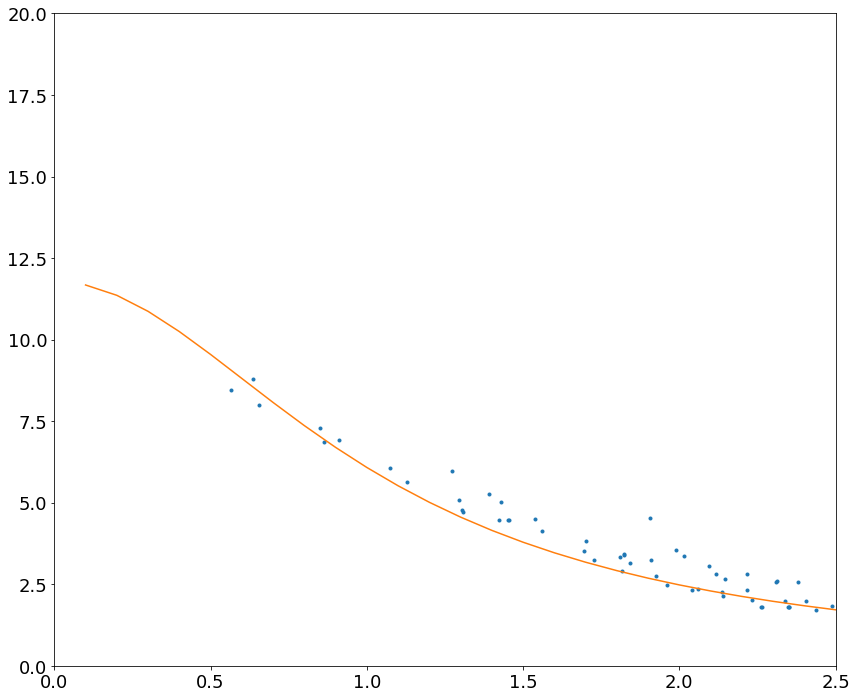

In [817]:
plt.figure(figsize=(14, 12))
plt.tick_params(labelsize=18)
plt.plot(KgridP250_8,KgridP250_8**2*(1/S_k-1/S_0)/(2*rho),'.')
plt.plot(numpy.arange(0,3*k_F,0.1),numpy.arange(0,3*k_F,0.1)**2*Jastr(Jastr_fit.beta[0],numpy.arange(0,3*k_F,0.1)))
#plt.plot(KgridP250_8,S_0)
plt.xlim(0,2.5)
plt.ylim(0,20)

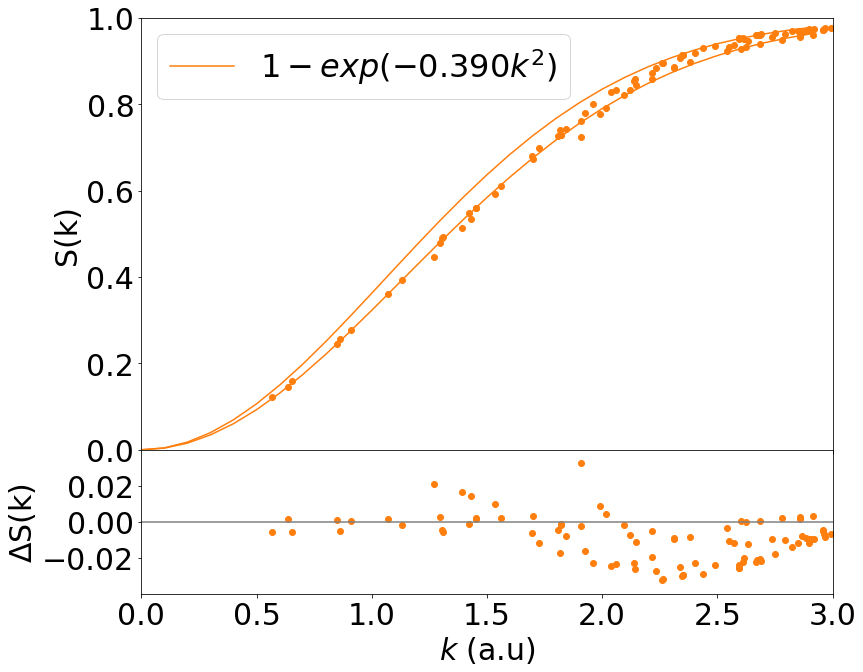

In [124]:
fig = plt.figure(figsize=(12, 10))
ax1 = fig.add_axes([0.17, 0.3, 0.8, 0.6],
                   xticklabels=[], ylim=(0, 1),xlim=(0,3))
ax2 = fig.add_axes([0.17, 0.1, 0.8, 0.2],
                   ylim=(-0.04, 0.04),xlim=(0,3))
ax1.tick_params(axis='y',labelsize=30)
ax1.set_ylabel("S(k)", fontsize=30)
ax2.tick_params(axis='y',labelsize=30)
ax2.set_ylabel("$\Delta$S(k)", fontsize=30)

plt.xticks(fontsize=30)
plt.yticks([-0.02,0.,0.02],fontsize=30)
#ax1.grid()
ax2.set_xlabel('$k$ (a.u)', fontsize=30)
#plotGrid=numpy.arange(0,1.2,0.01)

fitSofk=ODRfitSofk(KgridP250_8[numpy.where(KgridP250_8<2)],S_k[numpy.where(KgridP250_8<2)])
ax1.plot(numpy.arange(0,3,0.1),Sofk(fitSofk.beta[0],numpy.arange(0,3,0.1)),color='#ff7f0e')
#plt.plot(numpy.arange(0,3*k_F,0.1),Jastr(0.2,numpy.arange(0,3*k_F,0.1)))
#plt.plot(KgridP250_8,S_0)
ax1.legend(['$1-exp(- %.03f k^2)$' % fitSofk.beta[0]],fontsize=32)
ax1.plot(numpy.arange(0,3,0.1),Sofk(0.45,numpy.arange(0,3,0.1)),color='#ff7f0e')

ax1.errorbar(KgridP250_8,S_k,yerr=numpy.std(ScordataC2CP250_8[9/2]/96.,axis=1)/255**(0.5),fmt='o',color='#ff7f0e')

ax2.plot(KgridP250_8,Sofk(fitSofk.beta[0],KgridP250_8)-S_k,'o',color='#ff7f0e')
ax2.plot([0,3],[0,0],'-',color='gray')
#plt.yticks(fontsize=30,fontweight='bold')

#plt.xlim(0,3)
#plt.ylim(0,1)
#plt.tight_layout()
#plt.savefig('/local/home/vgorelov/Documents/Thesis/Sofk_C2cp250.pdf',dpi=300,format='pdf')


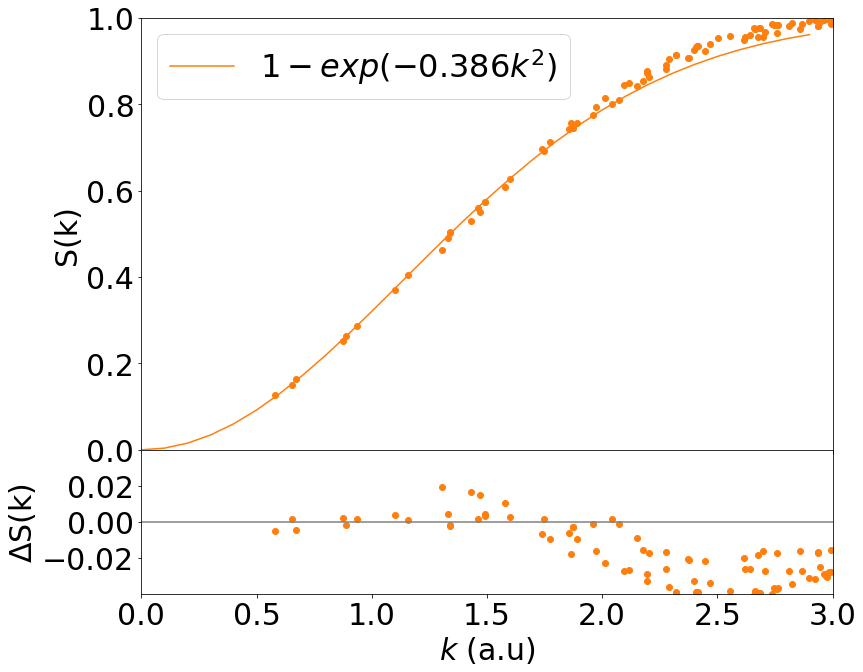

In [125]:
fig = plt.figure(figsize=(12, 10))
ax1 = fig.add_axes([0.17, 0.3, 0.8, 0.6],
                   xticklabels=[], ylim=(0, 1),xlim=(0,3))
ax2 = fig.add_axes([0.17, 0.1, 0.8, 0.2],
                   ylim=(-0.04, 0.04),xlim=(0,3))
ax1.tick_params(axis='y',labelsize=30)
ax1.set_ylabel("S(k)", fontsize=30)
ax2.tick_params(axis='y',labelsize=30)
ax2.set_ylabel("$\Delta$S(k)", fontsize=30)

S_k=numpy.average(ScordataC2CP300_L[9/2],axis=1)/96.


plt.xticks(fontsize=30)
plt.yticks([-0.02,0.,0.02],fontsize=30)
#ax1.grid()
ax2.set_xlabel('$k$ (a.u)', fontsize=30)
#plotGrid=numpy.arange(0,1.2,0.01)

fitSofk=ODRfitSofk(KgridP300_L[numpy.where(KgridP300_L<2)],S_k[numpy.where(KgridP300_L<2)])
ax1.plot(numpy.arange(0,3,0.1),Sofk(fitSofk.beta[0],numpy.arange(0,3,0.1)),color='#ff7f0e')
#plt.plot(numpy.arange(0,3*k_F,0.1),Jastr(0.2,numpy.arange(0,3*k_F,0.1)))
#plt.plot(KgridP300_L,S_0)
ax1.legend(['$1-exp(- %.03f k^2)$' % fitSofk.beta[0]],fontsize=32)

ax1.errorbar(KgridP300_L,S_k,yerr=numpy.std(ScordataC2CP300_L[9/2]/96.,axis=1)/255**(0.5),fmt='o',color='#ff7f0e')

ax2.plot(KgridP300_L,Sofk(fitSofk.beta[0],KgridP300_L)-S_k,'o',color='#ff7f0e')
ax2.plot([0,3],[0,0],'-',color='gray')

#plt.savefig('/local/home/vgorelov/Documents/Thesis/Sofk_C2cp300.pdf',dpi=300,format='pdf')


In [129]:
2.59-1.98

0.6099999999999999

In [130]:
2.74-2.08

0.6600000000000001